# Metop-A IASI Profile 0203 UTC 30 June 2012

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skewt import SkewT
import re
from six import StringIO

'''
Metop-A IASI Profile at 0203 UTC 30 June 2012
'''

press = "0 . 0 1 6   0 . 0 3 8   0 . 0 7 6   0 . 1 3 6   0 . 2 2 4   0 . 3 4 5   0 . 5 0 6   0 . 7 1 3   0 . 9 7 5   1 . 2 9 7   1 . 6 8 7   2 . 1 5 2   2 . 7   3 . 3 3 9   4 . 0 7 7   4 . 9 2   5 . 8 7 7   6 . 9 5 6   8 . 1 6 5   9 . 5 1 1   1 1 . 0   1 2 . 6   1 4 . 4   1 6 . 4   1 8 . 5   2 0 . 9   2 3 . 4   2 6 . 1   2 9 . 1   3 2 . 2   3 5 . 6   3 9 . 2   4 3 . 1   4 7 . 1   5 1 . 5   5 6 . 1   6 0 . 9   6 6 . 1   7 1 . 5   7 7 . 2   8 3 . 2   8 9 . 5   9 6 . 1   1 0 3 . 0   1 1 0 . 2   1 1 7 . 7   1 2 5 . 6   1 3 3 . 8   1 4 2 . 3   1 5 1 . 2   1 6 0 . 4   1 7 0 . 0   1 8 0 . 0   1 9 0 . 3   2 0 0 . 9   2 1 2 . 0   2 2 3 . 4   2 3 5 . 2   2 4 7 . 4   2 5 9 . 9   2 7 2 . 9   2 8 6 . 2   3 0 0 . 0   3 1 4 . 1   3 2 8 . 6   3 4 3 . 6   3 5 8 . 9   3 7 4 . 7   3 9 0 . 8   4 0 7 . 4   4 2 4 . 4   4 4 1 . 8   4 5 9 . 7   4 7 7 . 9   4 9 6 . 6   5 1 5 . 7   5 3 5 . 2   5 5 5 . 1   5 7 5 . 5   5 9 6 . 3   6 1 7 . 5   6 3 9 . 1   6 6 1 . 1   6 8 3 . 6   7 0 6 . 5   7 2 9 . 8   7 5 3 . 6   7 7 7 . 7   8 0 2 . 3   8 2 7 . 3   8 5 2 . 7   8 7 8 . 6   9 0 4 . 8   9 3 1 . 5   9 5 8 . 5   9 8 6 . 0"
temp = "1 9 3 . 3 1 2 5   2 0 5 . 9 3 7 5   2 1 8 . 8 5 9 3 8   2 3 1 . 7 3 4 3 8   2 4 2 . 1 2 5   2 5 2 . 2 6 5 6 2   2 6 0 . 4 2 1 8 8   2 6 6 . 0 4 6 8 8   2 6 9 . 2 8 1 2 5   2 7 0 . 5 6 2 5   2 6 8 . 7 8 1 2 5   2 6 6 . 2 6 5 6 2   2 6 1 . 8 9 0 6 2   2 5 6 . 6 8 7 5   2 5 1 . 8 9 0 6 2   2 4 7 . 1 0 9 3 8   2 4 2 . 4 3 7 5   2 3 8 . 8 2 8 1 2   2 3 6 . 1 7 1 8 8   2 3 4 . 0 7 8 1 2   2 3 1 . 5 9 3 7 5   2 2 9 . 3 1 2 5   2 2 7 . 5   2 2 6 . 1 0 9 3 8   2 2 4 . 9 2 1 8 8   2 2 3 . 5 1 5 6 2   2 2 2 . 1 2 5   2 2 0 . 7 5   2 1 9 . 4 2 1 8 8   2 1 8 . 2 3 4 3 8   2 1 7 . 2 9 6 8 8   2 1 6 . 5 9 3 7 5   2 1 5 . 8 2 8 1 2   2 1 4 . 7 3 4 3 8   2 1 3 . 5 7 8 1 2   2 1 2 . 7 1 8 7 5   2 1 2 . 0 6 2 5   2 1 1 . 4 6 8 7 5   2 1 0 . 7 9 6 8 8   2 0 9 . 5 9 3 7 5   2 0 8 . 0 6 2 5   2 0 6 . 5   2 0 5 . 2 5   2 0 4 . 3 2 8 1 2   2 0 4 . 2 3 4 3 8   2 0 4 . 7 0 3 1 2   2 0 5 . 5 1 5 6 2   2 0 6 . 7 6 5 6 2   2 0 8 . 3 9 0 6 2   2 1 0 . 2 0 3 1 2   2 1 2 . 1 2 5   2 1 4 . 0 6 2 5   2 1 5 . 9 0 6 2 5   2 1 7 . 7 3 4 3 8   2 1 9 . 6 2 5   2 2 1 . 6 4 0 6 2   2 2 3 . 8 1 2 5   2 2 6 . 1 5 6 2 5   2 2 8 . 5 7 8 1 2   2 3 1 . 0 4 6 8 8   2 3 3 . 4 8 4 3 8   2 3 5 . 9 2 1 8 8   2 3 8 . 3 9 0 6 2   2 4 0 . 9 0 6 2 5   2 4 3 . 5 1 5 6 2   2 4 6 . 0 4 6 8 8   2 4 8 . 5 3 1 2 5   2 5 0 . 9 6 8 7 5   2 5 3 . 3 5 9 3 8   2 5 5 . 7 1 8 7 5   2 5 8 . 0 1 5 6 2   2 6 0 . 2 3 4 3 8   2 6 2 . 3 1 2 5   2 6 4 . 2 8 1 2 5   2 6 6 . 1 8 7 5   2 6 8 . 0   2 6 9 . 8 1 2 5   2 7 1 . 6 5 6 2 5   2 7 3 . 6 2 5   2 7 5 . 8 4 3 7 5   2 7 8 . 2 9 6 8 8   2 8 0 . 4 6 8 7 5   2 8 1 . 8 2 8 1 2   2 8 2 . 8 7 5   2 8 4 . 1 7 1 8 8   2 8 5 . 7 6 5 6 2   2 8 7 . 6 2 5   2 8 9 . 6 5 6 2 5   2 9 1 . 8 7 5   2 9 4 . 0 4 6 8 8   2 9 6 . 0   2 9 7 . 5 1 5 6 2   2 9 8 . 6 5 6 2 5   2 9 9 . 0 7 8 1 2   2 9 8 . 1 7 1 8 8   2 9 6 . 1 8 7 5"
dewpt = "1 4 9 . 4 6 6 1   1 5 2 . 4 0 1 7   1 5 5 . 3 7 8 4 8   1 5 7 . 8 4 2 1 3   1 5 9 . 9 2 8 5   1 6 1 . 9 6 4 5 4   1 6 3 . 7 6 9 7   1 6 5 . 3 3 4 6 7   1 6 6 . 6 7 7 9 5   1 6 7 . 9 3 7 5 3   1 6 9 . 1 0 4 3 2   1 7 0 . 1 9 1 3 6   1 7 1 . 2 9 8 5 4   1 7 2 . 3 3 4 7 2   1 7 3 . 2 8 5 8   1 7 4 . 1 8 8 1 4   1 7 5 . 0 3 6 7 6   1 7 5 . 8 4 9 0 4   1 7 6 . 6 5 2 0 2   1 7 7 . 4 2 0 2 6   1 7 8 . 1 3 1 5 8   1 7 8 . 8 3 7 5 9   1 7 9 . 4 9 8 9 8   1 8 0 . 1 1 6 4 7   1 8 0 . 6 8 9 7 6   1 8 1 . 2 7 3 1 6   1 8 1 . 8 3 8 6 4   1 8 2 . 3 9 3 9   1 8 2 . 9 5 2 2 6   1 8 3 . 4 7 2 8 1   1 8 3 . 9 8 7 6 1   1 8 4 . 4 8 8 6 6   1 8 4 . 9 6 6 2 8   1 8 5 . 4 4 4 2 7   1 8 5 . 8 9 8 6 7   1 8 6 . 3 3 6   1 8 6 . 7 7 6 5 7   1 8 7 . 1 9 9 3 9   1 8 7 . 6 2 7 9 8   1 8 8 . 4 1 4 3 2   1 8 9 . 1 6 2 0 5   1 8 9 . 8 9 0 6 9   1 9 0 . 5 9 1 2   1 9 1 . 3 9 8 2 2   1 9 2 . 3 4 9 7   1 9 3 . 2 5 4 2 6   1 9 4 . 2 9 7 0 3   1 9 5 . 5 7 4 3 1   1 9 7 . 1 8 1 0 5   1 9 9 . 2 4 2 9 5   2 0 1 . 5 0 9 5   2 0 3 . 8 6 8 9 9   2 0 6 . 0 6 6 5 1   2 0 8 . 4 7 5 1 7   2 1 1 . 0 3 3 8 4   2 1 3 . 6 0 4 8   2 1 6 . 2 1 3 4   2 1 9 . 0 2 0 4   2 2 1 . 8 7 4 6 3   2 2 4 . 5 7 9 8 3   2 2 7 . 0 8 9 5   2 2 8 . 4 8 0 7   2 2 9 . 6 1 0 6 9   2 3 0 . 2 6 8 0 4   2 3 2 . 5 8 3 4 8   2 3 4 . 8 8 0 1 1   2 3 7 . 5 8 5 5   2 4 0 . 1 6 3 7 3   2 4 2 . 6 6 9 7   2 4 5 . 0 8 2 3   2 4 7 . 1 3 6 6   2 4 9 . 0 4 9 0 7   2 5 0 . 8 6 6 5   2 5 2 . 6 6 1 9 6   2 5 4 . 4 5 9   2 5 5 . 8 6 0 9 6   2 5 6 . 2 7 1 2 7   2 5 6 . 5 3 6 1 3   2 5 6 . 9 9 2 7 7   2 5 7 . 6 4 5 7 5   2 5 8 . 3 1 9 1 8   2 5 8 . 5 1 5 5   2 5 8 . 5 8 8 8 7   2 5 9 . 4 6 2 6   2 6 0 . 8 6 8 8   2 6 3 . 8 8 6 6 6   2 6 7 . 1 0 4 5 5   2 7 0 . 3 7 9 9   2 7 3 . 4 1 6 2   2 7 5 . 8 0 9 2   2 7 7 . 9 0 8 1 4   2 7 9 . 5 7 0 9 5   2 8 1 . 1 6 3 8 2   2 8 3 . 2 4 7 7 4   2 8 6 . 4 0 2 0 4   2 9 0 . 1 0 8 8 6"

print(press)
press = re.sub(r'\s(\.)\s+(\d)', r'\1\2', press)
press = re.sub('(?<=\d) (?=\d)', '', press)
press = re.sub(r'\s+\s', r' ', press)
print(press)
press = np.fromstring(press,dtype=float,sep=' ')
print(press,press.shape)
idx_p100 = np.where(press == 103.0)
print("Index press = 100: ", idx_p100)
print("Index press = 100: ", idx_p100[0])
print("Index press = 100: ", idx_p100[0][0])
press = press[idx_p100[0][0]:]
press = press[::-1]
print(len(press))
print(press,press.shape)

print(temp)
temp = re.sub(r'\s(\.)\s+(\d)', r'\1\2', temp)
temp = re.sub('(?<=\d) (?=\d)', '', temp)
temp = re.sub(r'\s+\s', r' ', temp)
print(temp)
temp = np.fromstring(temp,dtype=float,sep=' ')
print(temp,temp.shape)
temp = temp[idx_p100[0][0]:]
temp = temp[::-1]
print(len(temp))
print(temp,temp.shape)

print(dewpt)
dewpt = re.sub(r'\s(\.)\s+(\d)', r'\1\2', dewpt)
dewpt = re.sub('(?<=\d) (?=\d)', '', dewpt)
dewpt = re.sub(r'\s+\s', r' ', dewpt)
print(dewpt)
dewpt = np.fromstring(dewpt,dtype=float,sep=' ')
print(dewpt,dewpt.shape)
dewpt = dewpt[idx_p100[0][0]:]
dewpt = dewpt[::-1]
print(len(dewpt))
print(dewpt,dewpt.shape)
data_txt = '''
0.1
0.5
0.7
1
1.25
1.5
1.75
2
2.25
2.5
2.75
3
3.2
3.5
3.7
4
4.25
4.5
4.8
5
5.5
5.7
6
6.2
6.5
6.75
7
7.5
7.7
8
8.25
8.5
8.8
9
9.5
9.8
10
10.5
10.75
11
11.5
11.75
12
12.5
13
13.25
13.5
14
14.5
15
15.25
15.5
16
'''
height_km = StringIO(data_txt)
height_km = np.loadtxt(height_km, usecols=range(0, 0), unpack=True)
height_m = height_km * 1000
print(height_m,len(height_m))
height_km = height_m/1000
print(height_km,len(height_km))
pressure_pa = press
temperature_c = temp-273.15 
dewpoint_c = dewpt-273.15 
RH = 100*(np.exp((17.625*dewpoint_c)/(243.04+dewpoint_c))/np.exp((17.625*temperature_c)/(243.04+temperature_c)))
L_vapor = 2500

thetae = (273.15 + temperature_c)*((1000/pressure_pa)**0.286)+(3 * (RH * (3.884266 * 10**
         ((7.5 * temperature_c)/(237.7 + temperature_c)))/100))
wetbulb = temperature_c*(np.arctan(0.151977*((RH+8.313659)**0.5))) + (np.arctan(temperature_c+RH)) - (np.arctan(RH-1.676331))+((0.00391838*(RH**1.5))*(np.arctan(0.023101*RH))) - 4.686035
WBD = temperature_c - wetbulb
satmixrat = (6.11*(10**((7.5*temperature_c)/(237.7+temperature_c))))/1000
print("Sat_mix_ratio = ",satmixrat)
mixrat = (6.11*(10**((7.5*dewpoint_c)/(237.7+dewpoint_c))))/1000
print("Mix_ratio = ",mixrat)
thetaw = thetae - (L_vapor*mixrat)
tempvirt = temp*(1+(0.61*(mixrat)))
tempvirt_c = tempvirt - 273.15
print("Virtual Temperature (C) = ",tempvirt_c)
tempvirt_exc = tempvirt_c - temperature_c

idx_pup = np.where(press == 706.5)
idx_plo = np.where(press == 931.5)
print("PUP idx = ", idx_pup)
print("PLO idx = ", idx_plo)
T_sfc = temp[idx_plo]
T_top = temp[idx_pup]
wetbulb_sfc = wetbulb[idx_plo]
wetbulb_top = wetbulb[idx_pup]
thetaw_sfc = thetaw[idx_pup]
delta_z = 2300
delta_zkm = 2.3
gamma = (T_sfc - T_top)/(delta_zkm)
gamma_wb = (wetbulb_sfc - wetbulb_top)/(delta_zkm)
DCAPE = 0.5 * 9.81 * ((T_sfc-thetaw_sfc)/T_sfc) * delta_z
W_max = ((2*DCAPE)**0.5)*1.94384
 
mydata=dict(zip(('hght','pres','temp','dwpt','thtae','thetaw','wetbulb','depression','tempvirt','tempvirt_exc'),(height_m,pressure_pa,temperature_c,dewpoint_c,thetae,thetaw,wetbulb,WBD,tempvirt_c,tempvirt_exc)))
print(mydata)

print("Gamma = ", gamma)
print("Wetbulb Gamma = ", gamma_wb)
print("DCAPE = ", DCAPE)
print("Downdraft Wmax = ", W_max)

0 . 0 1 6   0 . 0 3 8   0 . 0 7 6   0 . 1 3 6   0 . 2 2 4   0 . 3 4 5   0 . 5 0 6   0 . 7 1 3   0 . 9 7 5   1 . 2 9 7   1 . 6 8 7   2 . 1 5 2   2 . 7   3 . 3 3 9   4 . 0 7 7   4 . 9 2   5 . 8 7 7   6 . 9 5 6   8 . 1 6 5   9 . 5 1 1   1 1 . 0   1 2 . 6   1 4 . 4   1 6 . 4   1 8 . 5   2 0 . 9   2 3 . 4   2 6 . 1   2 9 . 1   3 2 . 2   3 5 . 6   3 9 . 2   4 3 . 1   4 7 . 1   5 1 . 5   5 6 . 1   6 0 . 9   6 6 . 1   7 1 . 5   7 7 . 2   8 3 . 2   8 9 . 5   9 6 . 1   1 0 3 . 0   1 1 0 . 2   1 1 7 . 7   1 2 5 . 6   1 3 3 . 8   1 4 2 . 3   1 5 1 . 2   1 6 0 . 4   1 7 0 . 0   1 8 0 . 0   1 9 0 . 3   2 0 0 . 9   2 1 2 . 0   2 2 3 . 4   2 3 5 . 2   2 4 7 . 4   2 5 9 . 9   2 7 2 . 9   2 8 6 . 2   3 0 0 . 0   3 1 4 . 1   3 2 8 . 6   3 4 3 . 6   3 5 8 . 9   3 7 4 . 7   3 9 0 . 8   4 0 7 . 4   4 2 4 . 4   4 4 1 . 8   4 5 9 . 7   4 7 7 . 9   4 9 6 . 6   5 1 5 . 7   5 3 5 . 2   5 5 5 . 1   5 7 5 . 5   5 9 6 . 3   6 1 7 . 5   6 3 9 . 1   6 6 1 . 1   6 8 3 . 6   7 0 6 . 5   7 2 9 . 8   7 5 3 . 6   7 7 7 . 

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:149: RuntimeWarning: invalid value encountered in sqrt


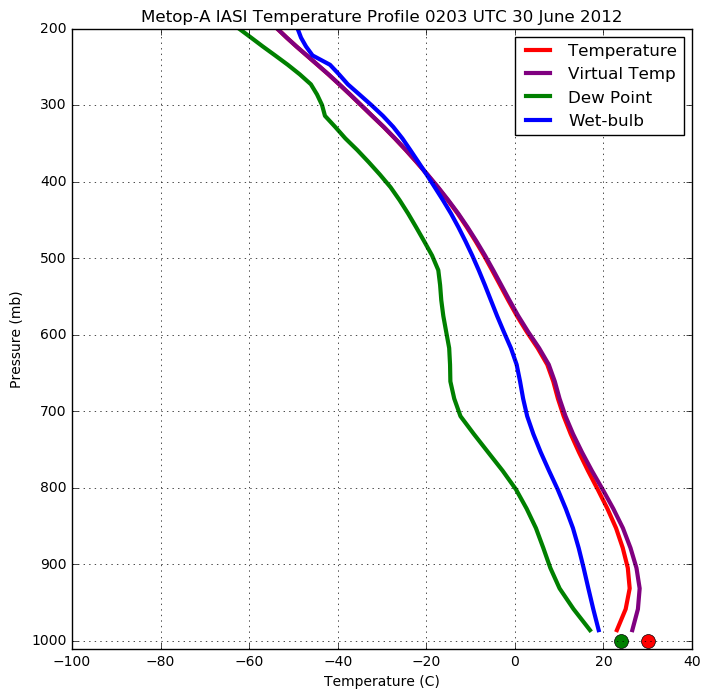

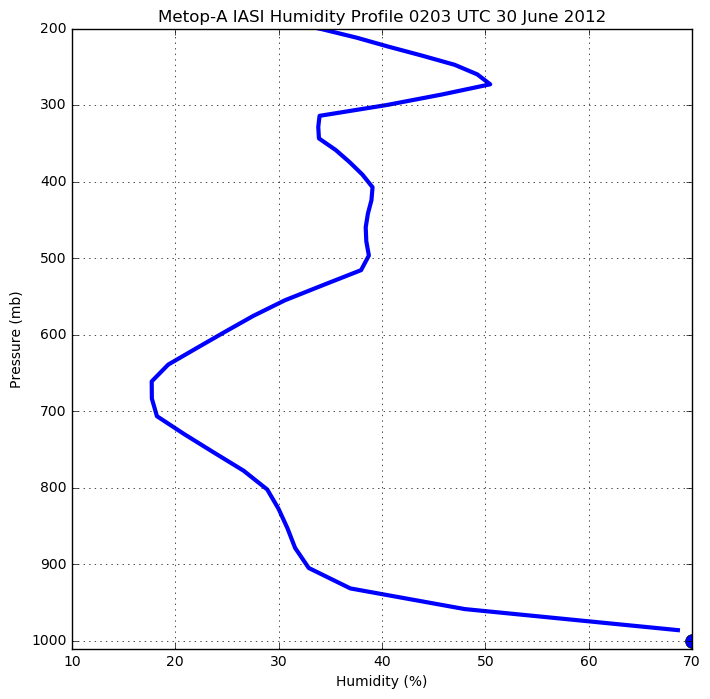

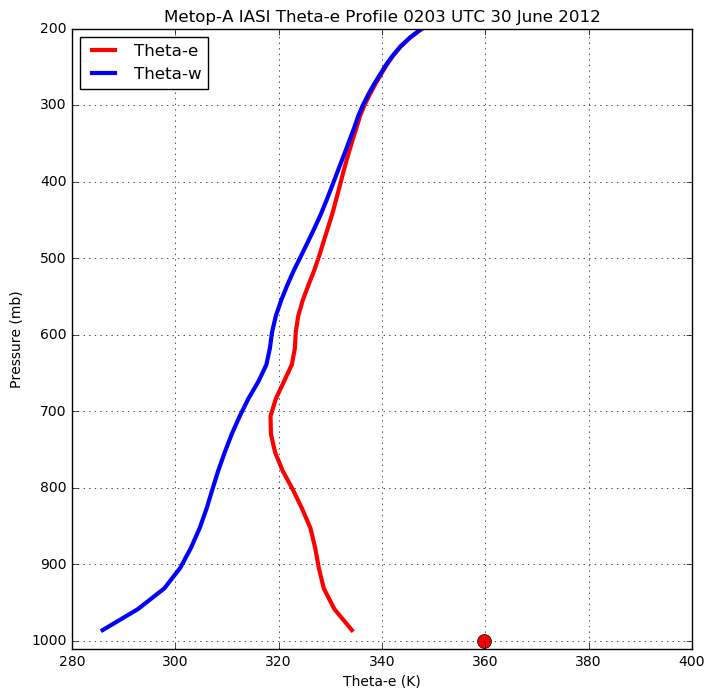

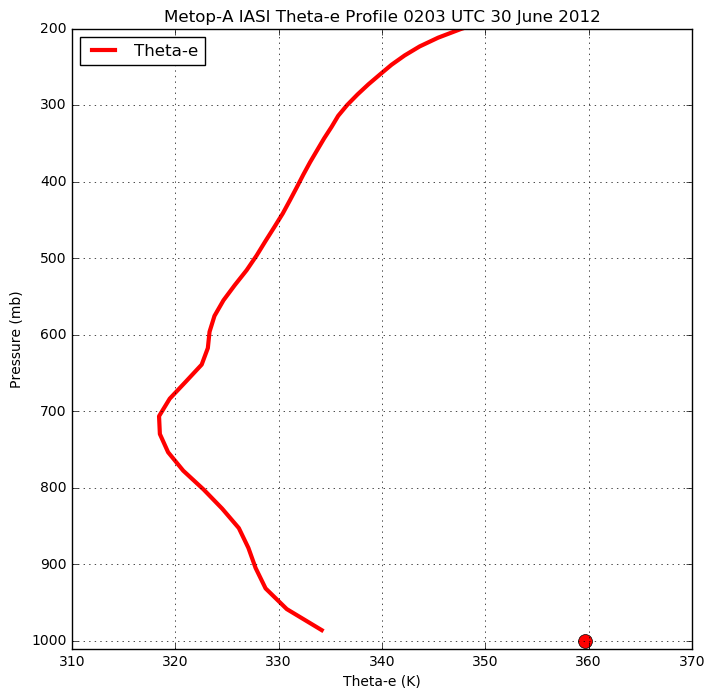

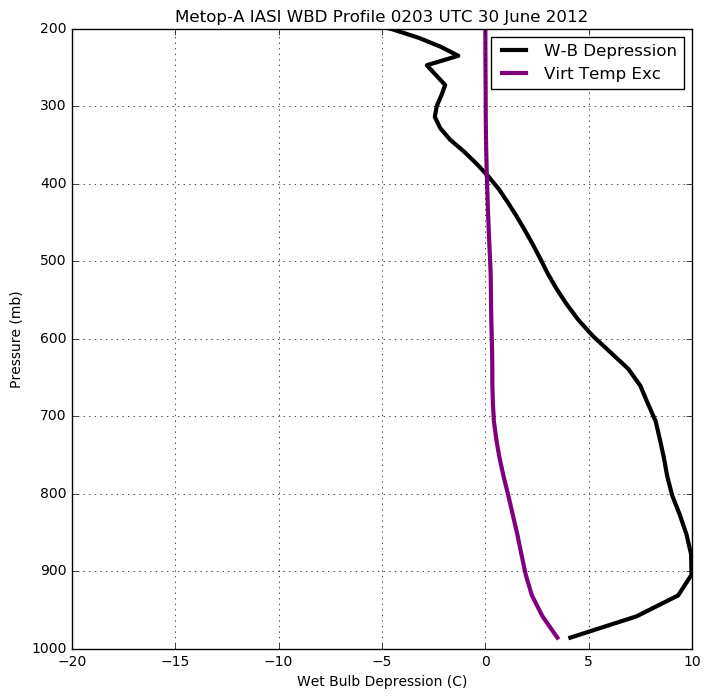

In [2]:
temperature_sfc = 30
dewpoint_sfc = 24
humidity_sfc = 70
pressure_sfc = 1000
thetae_sfc = (273.15 + temperature_sfc)*((1000/pressure_sfc)**0.286)+(3 * (humidity_sfc * (3.884266 * 10**
         ((7.5 * temperature_sfc)/(237.7 + temperature_sfc)))/100))
fig = plt.figure(figsize=(8,8))
plt.plot(temperature_c,pressure_pa,color='red',linewidth=3,label='Temperature')
plt.plot(tempvirt_c,pressure_pa,color='purple',linewidth=3,label='Virtual Temp')
plt.plot(dewpoint_c,pressure_pa,color='green',linewidth=3,label='Dew Point')
plt.plot(wetbulb,pressure_pa,color='blue',linewidth=3,label='Wet-bulb')
plt.plot(temperature_sfc,pressure_sfc,'ro',markersize=10)
plt.plot(dewpoint_sfc,pressure_sfc,'go',markersize=10)
plt.ylim(1010,200)
plt.ylabel("Pressure (mb)")
plt.xlabel("Temperature (C)")
plt.title("Metop-A IASI Temperature Profile 0203 UTC 30 June 2012")
plt.grid(True)
plt.legend(loc='upper right')
plt.savefig("iasi_temp_press_0203.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(8,8))
plt.plot(RH,pressure_pa,color='blue',linewidth=3)
plt.plot(humidity_sfc,pressure_sfc,'bo',markersize=10)
plt.ylim(1010,200)
plt.ylabel("Pressure (mb)")
plt.xlabel("Humidity (%)")
plt.title("Metop-A IASI Humidity Profile 0203 UTC 30 June 2012")
plt.grid(True)
plt.savefig("iasi_humidity_press_0203.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(8,8))
plt.plot(thetae,pressure_pa,color='red',linewidth=3,label='Theta-e')
plt.plot(thetaw,pressure_pa,color='blue',linewidth=3,label='Theta-w')
plt.plot(thetae_sfc,pressure_sfc,'ro',markersize=10)
plt.ylim(1010,200)
plt.ylabel("Pressure (mb)")
plt.xlabel("Theta-e (K)")
plt.title("Metop-A IASI Theta-e Profile 0203 UTC 30 June 2012")
plt.grid(True)
plt.legend(loc='upper left')
plt.savefig("iasi_thtae_press_0203.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(8,8))
plt.plot(thetae,pressure_pa,color='red',linewidth=3,label='Theta-e')
plt.plot(thetae_sfc,pressure_sfc,'ro',markersize=10)
plt.xlim(310,370)
plt.ylim(1010,200)
plt.ylabel("Pressure (mb)")
plt.xlabel("Theta-e (K)")
plt.title("Metop-A IASI Theta-e Profile 0203 UTC 30 June 2012")
plt.grid(True)
plt.legend(loc='upper left')
plt.savefig("iasi_thtae_0203.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(8,8))
plt.plot(WBD,pressure_pa,color='black',linewidth=3,label='W-B Depression')
plt.plot(tempvirt_exc,pressure_pa,color='purple',linewidth=3,label='Virt Temp Exc')
plt.ylim(1000,200)
plt.ylabel("Pressure (mb)")
plt.xlabel("Wet Bulb Depression (C)")
plt.title("Metop-A IASI WBD Profile 0203 UTC 30 June 2012")
plt.grid(True)
plt.legend(loc='upper right')
plt.savefig("iasi_wbd_press_0203.png",dpi=250,bbox_inches='tight')
plt.show()

('PUP idx = ', (array([11]),))
('PLO idx = ', (array([2]),))

---- Lifted Parcel Quantities ----
Parcel: SB
Ps  : 986.0hPa
TCs :  23.0C
TDs :  17.0C
-------------
Plcl: 901.9hPa
Tlcl:  15.6C
Plfc:   nanhPa
P_el:   nanhPa
CAPE:   0.0J
CIN:    0.0J
(986.0, 23.037500000000023, 16.958860000000016, 'sb')
('CAPE = ', 0)
Figure saved


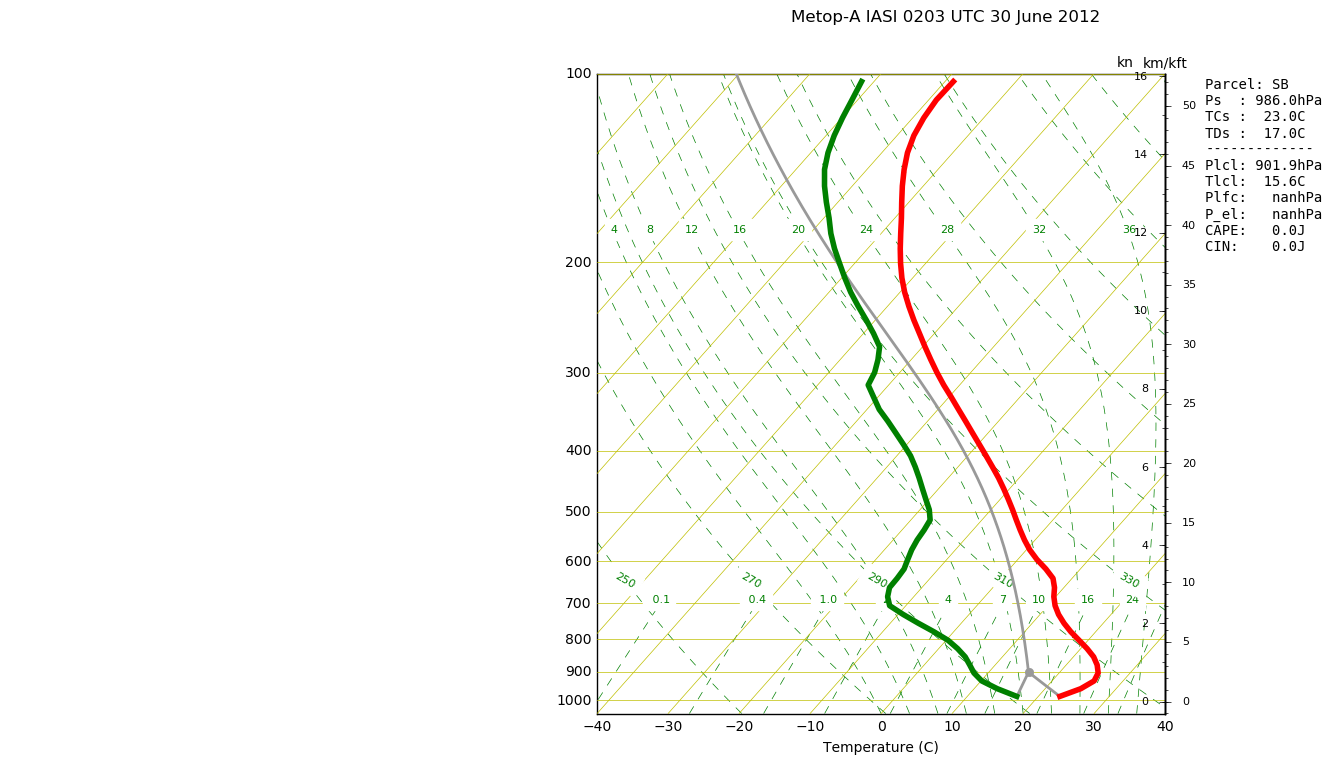

('Z_UP = ', array([ 3.]))
('P_UP = ', array([ 706.5]))
('T_UP = ', array([ 284.17188]))
('TD_UP = ', array([ 260.8688]))
('Z_LO = ', array([ 0.7]))
('P_LO = ', array([ 931.5]))
('T_LO = ', array([ 299.07812]))
('TD_LO = ', array([ 283.24774]))
('DD_UP = ', array([ 23.30308]))
('DD_LO = ', array([ 15.83038]))
('DDD = ', 0)
('Gamma = ', array([ 6.48097391]))
('MWPI_IRv1 = ', array([ 6.48097391]))
('WGP_IR = ', array([ 31.71978742]))
('MWPI_IRv2 = ', array([ 1.29619478]))
('WGP_IRv2 = ', array([ 36.09288547]))
('T_UP_mid = ', array([ 11.02188]))
('T_LO_mid = ', array([ 25.92812]))
('TD_LO_mid = ', array([ 283.24774]))
('Tdiff = ', array([ 14.90624]))
('DD_LO = ', array([-257.31962]))
('ST = ', 3)
('MT = ', 1)
('HI = ', 4)
('Tdiff = ', array([ 14.90624]))
('DD_LO = ', array([ 15.83038]))
('ST = ', 1)
('MT = ', 2)
('HI = ', 3)
('Tdiff = ', array([ 14.90624]))
('DD_LO = ', array([-257.31962]))
('ST = ', 3)
('MT = ', 1)
('HI = ', 4)
('Haines Index MID = ', 4)
('Haines Index HIGH = ', 3)
('C-H

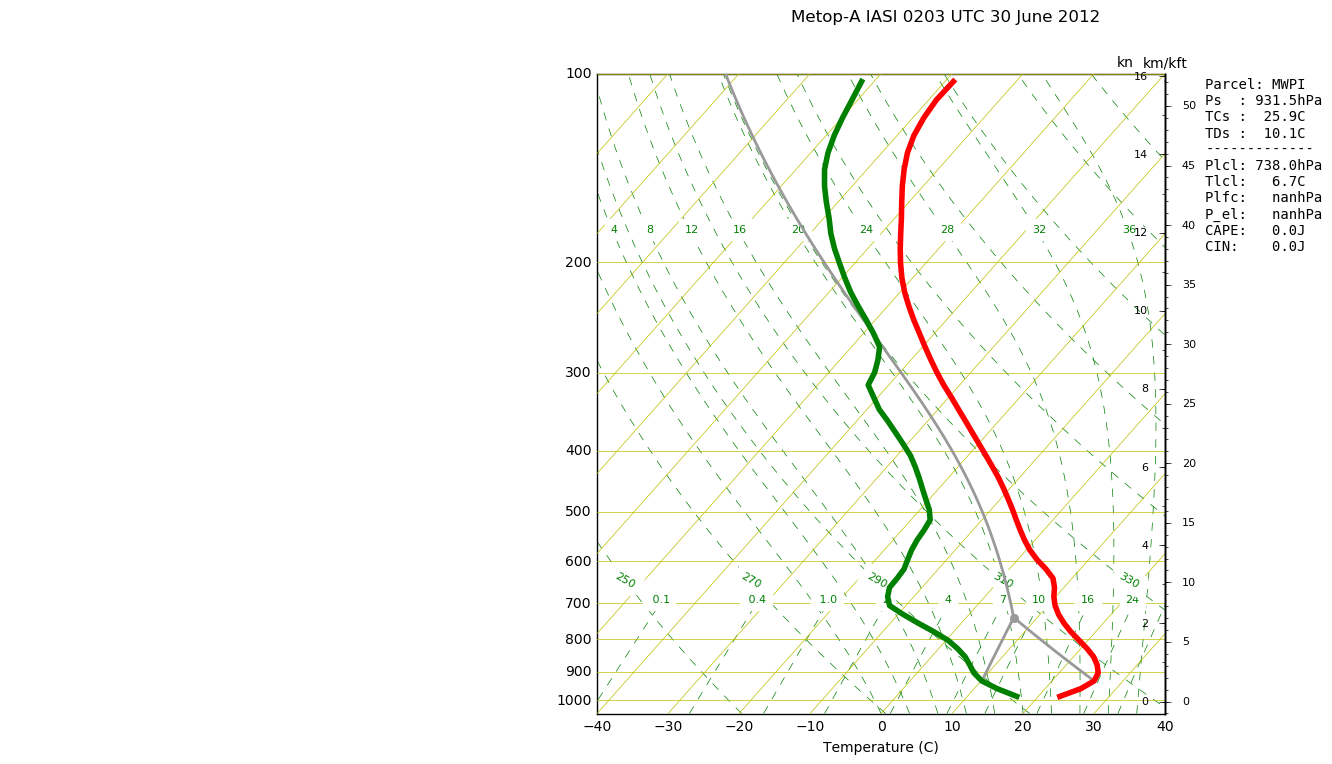


---- Lifted Parcel Quantities ----
Parcel: SB
Ps  : 986.0hPa
TCs :  23.0C
TDs :  17.0C
-------------
Plcl: 901.9hPa
Tlcl:  15.6C
Plfc:   nanhPa
P_el:   nanhPa
CAPE:   0.0J
CIN:    0.0J
Figure saved


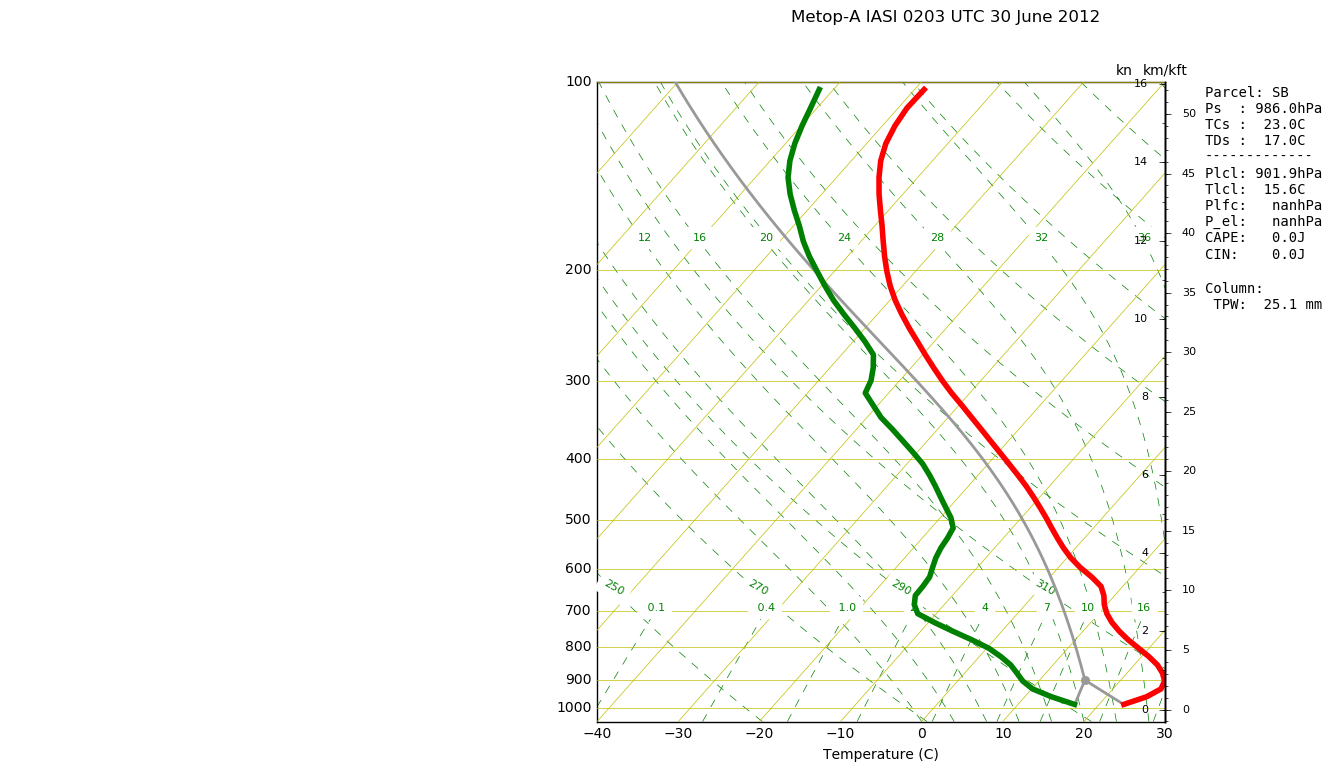

In [4]:
idx_pup = np.where(press == 706.5)
idx_plo = np.where(press == 931.5)
print("PUP idx = ", idx_pup)
print("PLO idx = ", idx_plo)

S=SkewT.Sounding(soundingdata=mydata)
S.make_skewt_axes(tmin=-40.,tmax=40.,pmin=100.,pmax=1050.)
S.add_profile()
parcel=S.get_parcel(method='mu')
S.lift_parcel(*parcel)
print(parcel)
P_lcl,P_lfc,P_el,CAPE,CIN=S.get_cape(*parcel)
print("CAPE = ",CAPE)
fig.suptitle('Metop-A IASI 0203 UTC 30 June 2012')
plt.suptitle('Metop-A IASI 0203 UTC 30 June 2012',size=12)
plt.savefig("skewt_iasi_0630_0203_mu.png",dpi=250,bbox_inches='tight')
print("Figure saved")
plt.show()

#Compute the Microburst Windspeed Potential Index (MWPI)
Z_UP = height_km[idx_pup]
print("Z_UP = ", Z_UP)
P_UP = press[idx_pup]
print("P_UP = ", P_UP)
T_UP = temp[idx_pup]
print("T_UP = ", T_UP)
TD_UP = dewpt[idx_pup]
print("TD_UP = ", TD_UP)
Z_LO = height_km[idx_plo]
print("Z_LO = ", Z_LO)
P_LO = press[idx_plo]
print("P_LO = ", P_LO)
T_LO = temp[idx_plo]
print("T_LO = ", T_LO)
TD_LO = dewpt[idx_plo]
print("TD_LO = ", TD_LO)

def MWPI(Z_UP, Z_LO, T_UP, T_LO, TD_UP, TD_LO, CAPE):
    gamma = (T_LO - T_UP)/(Z_UP - Z_LO)
    DD_UP = T_UP - TD_UP
    print("DD_UP = ", DD_UP)
    DD_LO = T_LO - TD_LO
    print("DD_LO = ", DD_LO)
    DDD = DD_LO - DD_UP
    if DDD < 0:
        DDD = 0
    print("DDD = ", DDD)
    MWPI_IRv1 = (CAPE/100) + gamma + DDD
    MWPI_IRv2 = (CAPE/1000) + (gamma/5) + (DDD/5)
    WGP_IR = (0.4553 * MWPI_IRv1) + 28.769
    WGP_IRv2 = (0.35435365777*(MWPI_IRv2**2)) + (1.29598552473*MWPI_IRv2) + 33.8176788073
    return gamma, MWPI_IRv1, MWPI_IRv2, WGP_IR, WGP_IRv2
    
gamma, MWPI_IRv1, MWPI_IRv2, WGP_IR, WGP_IRv2 = MWPI(Z_UP, Z_LO, T_UP, T_LO, TD_UP, TD_LO, CAPE)

print("Gamma = ", gamma)
print("MWPI_IRv1 = ", MWPI_IRv1)
print("WGP_IR = ", WGP_IR)
print("MWPI_IRv2 = ", MWPI_IRv2)
print("WGP_IRv2 = ", WGP_IRv2)

def Haines_H(T_UP, T_LO, TD_LO):
    Tdiff = T_LO - T_UP
    print("Tdiff = ", Tdiff)
    DD_LO = T_LO - TD_LO
    print("DD_LO = ", DD_LO)
    if Tdiff < 17:
        ST = 1
    elif Tdiff >= 17 and Tdiff <= 21:
        ST = 2
    else:
        ST = 3   
    if DD_LO < 14:
        MT = 1
    elif DD_LO >= 14 and DD_LO <= 20:
        MT = 2
    else:    
        MT = 3
    HI = ST + MT    
    print("ST = ", ST)
    print("MT = ", MT)
    print("HI = ", HI)
    return HI
 
def Haines_M(T_UP, T_LO, TD_LO):
    Tdiff = T_LO - T_UP
    print("Tdiff = ", Tdiff)
    DD_LO = T_LO - TD_LO
    print("DD_LO = ", DD_LO)
    if Tdiff < 5:
        ST = 1
    elif Tdiff >= 5 and Tdiff <= 10:
        ST = 2
    else:
        ST = 3   
    if DD_LO < 5:
        MT = 1
    elif DD_LO >= 5 and DD_LO <= 12:
        MT = 2
    else:    
        MT = 3
    HI = ST + MT    
    print("ST = ", ST)
    print("MT = ", MT)
    print("HI = ", HI)
    return HI
        
def C_Haines(T_UP, T_LO, TD_LO):
    Tdiff = T_LO - T_UP
    print("Tdiff = ", Tdiff)
    DD_LO = T_LO - TD_LO
    print("DD_LO = ", DD_LO)
    if DD_LO >30:
        DD_LO=30
    CA=((T_LO-T_UP)/2)-2
    CB=((DD_LO)/3)-1
    if CB>5:
        CB=5+(CB-5)/2
    CH=CA+CB
    return CH
         
idx_pup_mid = np.where(press == 706.5)
idx_plo_mid = np.where(press == 931.5)
T_UP_mid = temperature_c[idx_pup_mid]
print("T_UP_mid = ", T_UP_mid)
T_LO_mid = temperature_c[idx_plo_mid]
print("T_LO_mid = ", T_LO_mid)
TD_LO_mid = dewpt[idx_plo_mid]
print("TD_LO_mid = ", TD_LO_mid)
    
HI_M = Haines_M(T_UP_mid, T_LO_mid, TD_LO_mid)
HI_H = Haines_H(T_UP, T_LO, TD_LO)
CH = Haines_M(T_UP_mid, T_LO_mid, TD_LO_mid)
    
print("Haines Index MID = ", HI_M)
print("Haines Index HIGH = ", HI_H)
print("C-Haines Index = ", CH)

temp_p2 = temperature_c[idx_plo]
dewpt_p2 = dewpoint_c[idx_plo]

fig = plt.figure(figsize=(8, 8))
parcel_2=(931.5, temp_p2, dewpt_p2, 'mwpi')
S.make_skewt_axes(tmin=-40.,tmax=40.,pmin=100.,pmax=1050.)
S.add_profile()
S.lift_parcel(*parcel_2)
print(parcel_2)
P_lcl,P_lfc,P_el,CAPE,CIN=S.get_cape(*parcel_2)
print("CAPE = ",CAPE)
fig.suptitle('Metop-A IASI 0203 UTC 30 June 2012')
plt.suptitle('Metop-A IASI 0203 UTC 30 June 2012',size=12)
plt.savefig("skewt_mwpi_iasi_0630_0203.png",dpi=250,bbox_inches='tight')
print("Figure saved")
plt.show()

fig = plt.figure(figsize=(8, 8))
S.plot_skewt()
fig.suptitle('Metop-A IASI 0203 UTC 30 June 2012')
plt.suptitle('Metop-A IASI 0203 UTC 30 June 2012',size=12,horizontalalignment='center',verticalalignment='center')
plt.savefig("skewt_metop_iasi_0203.png",dpi=250,bbox_inches='tight')
print("Figure saved")
plt.show()

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from skewt import SkewT
import re
from six import StringIO

'''
Metop-A IASI Modified Profile at 0203 UTC 30 June 2012
'''

press = "0 . 0 1 6   0 . 0 3 8   0 . 0 7 6   0 . 1 3 6   0 . 2 2 4   0 . 3 4 5   0 . 5 0 6   0 . 7 1 3   0 . 9 7 5   1 . 2 9 7   1 . 6 8 7   2 . 1 5 2   2 . 7   3 . 3 3 9   4 . 0 7 7   4 . 9 2   5 . 8 7 7   6 . 9 5 6   8 . 1 6 5   9 . 5 1 1   1 1 . 0   1 2 . 6   1 4 . 4   1 6 . 4   1 8 . 5   2 0 . 9   2 3 . 4   2 6 . 1   2 9 . 1   3 2 . 2   3 5 . 6   3 9 . 2   4 3 . 1   4 7 . 1   5 1 . 5   5 6 . 1   6 0 . 9   6 6 . 1   7 1 . 5   7 7 . 2   8 3 . 2   8 9 . 5   9 6 . 1   1 0 3 . 0   1 1 0 . 2   1 1 7 . 7   1 2 5 . 6   1 3 3 . 8   1 4 2 . 3   1 5 1 . 2   1 6 0 . 4   1 7 0 . 0   1 8 0 . 0   1 9 0 . 3   2 0 0 . 9   2 1 2 . 0   2 2 3 . 4   2 3 5 . 2   2 4 7 . 4   2 5 9 . 9   2 7 2 . 9   2 8 6 . 2   3 0 0 . 0   3 1 4 . 1   3 2 8 . 6   3 4 3 . 6   3 5 8 . 9   3 7 4 . 7   3 9 0 . 8   4 0 7 . 4   4 2 4 . 4   4 4 1 . 8   4 5 9 . 7   4 7 7 . 9   4 9 6 . 6   5 1 5 . 7   5 3 5 . 2   5 5 5 . 1   5 7 5 . 5   5 9 6 . 3   6 1 7 . 5   6 3 9 . 1   6 6 1 . 1   6 8 3 . 6   7 0 6 . 5   7 2 9 . 8   7 5 3 . 6   7 7 7 . 7   8 0 2 . 3   8 2 7 . 3   8 5 2 . 7   8 7 8 . 6   9 0 4 . 8   9 3 1 . 5   1 0 0 0 . 0"
temp = "1 9 3 . 3 1 2 5   2 0 5 . 9 3 7 5   2 1 8 . 8 5 9 3 8   2 3 1 . 7 3 4 3 8   2 4 2 . 1 2 5   2 5 2 . 2 6 5 6 2   2 6 0 . 4 2 1 8 8   2 6 6 . 0 4 6 8 8   2 6 9 . 2 8 1 2 5   2 7 0 . 5 6 2 5   2 6 8 . 7 8 1 2 5   2 6 6 . 2 6 5 6 2   2 6 1 . 8 9 0 6 2   2 5 6 . 6 8 7 5   2 5 1 . 8 9 0 6 2   2 4 7 . 1 0 9 3 8   2 4 2 . 4 3 7 5   2 3 8 . 8 2 8 1 2   2 3 6 . 1 7 1 8 8   2 3 4 . 0 7 8 1 2   2 3 1 . 5 9 3 7 5   2 2 9 . 3 1 2 5   2 2 7 . 5   2 2 6 . 1 0 9 3 8   2 2 4 . 9 2 1 8 8   2 2 3 . 5 1 5 6 2   2 2 2 . 1 2 5   2 2 0 . 7 5   2 1 9 . 4 2 1 8 8   2 1 8 . 2 3 4 3 8   2 1 7 . 2 9 6 8 8   2 1 6 . 5 9 3 7 5   2 1 5 . 8 2 8 1 2   2 1 4 . 7 3 4 3 8   2 1 3 . 5 7 8 1 2   2 1 2 . 7 1 8 7 5   2 1 2 . 0 6 2 5   2 1 1 . 4 6 8 7 5   2 1 0 . 7 9 6 8 8   2 0 9 . 5 9 3 7 5   2 0 8 . 0 6 2 5   2 0 6 . 5   2 0 5 . 2 5   2 0 4 . 3 2 8 1 2   2 0 4 . 2 3 4 3 8   2 0 4 . 7 0 3 1 2   2 0 5 . 5 1 5 6 2   2 0 6 . 7 6 5 6 2   2 0 8 . 3 9 0 6 2   2 1 0 . 2 0 3 1 2   2 1 2 . 1 2 5   2 1 4 . 0 6 2 5   2 1 5 . 9 0 6 2 5   2 1 7 . 7 3 4 3 8   2 1 9 . 6 2 5   2 2 1 . 6 4 0 6 2   2 2 3 . 8 1 2 5   2 2 6 . 1 5 6 2 5   2 2 8 . 5 7 8 1 2   2 3 1 . 0 4 6 8 8   2 3 3 . 4 8 4 3 8   2 3 5 . 9 2 1 8 8   2 3 8 . 3 9 0 6 2   2 4 0 . 9 0 6 2 5   2 4 3 . 5 1 5 6 2   2 4 6 . 0 4 6 8 8   2 4 8 . 5 3 1 2 5   2 5 0 . 9 6 8 7 5   2 5 3 . 3 5 9 3 8   2 5 5 . 7 1 8 7 5   2 5 8 . 0 1 5 6 2   2 6 0 . 2 3 4 3 8   2 6 2 . 3 1 2 5   2 6 4 . 2 8 1 2 5   2 6 6 . 1 8 7 5   2 6 8 . 0   2 6 9 . 8 1 2 5   2 7 1 . 6 5 6 2 5   2 7 3 . 6 2 5   2 7 5 . 8 4 3 7 5   2 7 8 . 2 9 6 8 8   2 8 0 . 4 6 8 7 5   2 8 1 . 8 2 8 1 2   2 8 2 . 8 7 5   2 8 4 . 1 7 1 8 8   2 8 5 . 7 6 5 6 2   2 8 7 . 6 2 5   2 8 9 . 6 5 6 2 5   2 9 1 . 8 7 5   2 9 4 . 0 4 6 8 8   2 9 6 . 0   2 9 7 . 5 1 5 6 2   2 9 8 . 6 5 6 2 5   2 9 9 . 0 7 8 1 2   3 0 3 . 1 5"
dewpt = "1 4 9 . 4 6 6 1   1 5 2 . 4 0 1 7   1 5 5 . 3 7 8 4 8   1 5 7 . 8 4 2 1 3   1 5 9 . 9 2 8 5   1 6 1 . 9 6 4 5 4   1 6 3 . 7 6 9 7   1 6 5 . 3 3 4 6 7   1 6 6 . 6 7 7 9 5   1 6 7 . 9 3 7 5 3   1 6 9 . 1 0 4 3 2   1 7 0 . 1 9 1 3 6   1 7 1 . 2 9 8 5 4   1 7 2 . 3 3 4 7 2   1 7 3 . 2 8 5 8   1 7 4 . 1 8 8 1 4   1 7 5 . 0 3 6 7 6   1 7 5 . 8 4 9 0 4   1 7 6 . 6 5 2 0 2   1 7 7 . 4 2 0 2 6   1 7 8 . 1 3 1 5 8   1 7 8 . 8 3 7 5 9   1 7 9 . 4 9 8 9 8   1 8 0 . 1 1 6 4 7   1 8 0 . 6 8 9 7 6   1 8 1 . 2 7 3 1 6   1 8 1 . 8 3 8 6 4   1 8 2 . 3 9 3 9   1 8 2 . 9 5 2 2 6   1 8 3 . 4 7 2 8 1   1 8 3 . 9 8 7 6 1   1 8 4 . 4 8 8 6 6   1 8 4 . 9 6 6 2 8   1 8 5 . 4 4 4 2 7   1 8 5 . 8 9 8 6 7   1 8 6 . 3 3 6   1 8 6 . 7 7 6 5 7   1 8 7 . 1 9 9 3 9   1 8 7 . 6 2 7 9 8   1 8 8 . 4 1 4 3 2   1 8 9 . 1 6 2 0 5   1 8 9 . 8 9 0 6 9   1 9 0 . 5 9 1 2   1 9 1 . 3 9 8 2 2   1 9 2 . 3 4 9 7   1 9 3 . 2 5 4 2 6   1 9 4 . 2 9 7 0 3   1 9 5 . 5 7 4 3 1   1 9 7 . 1 8 1 0 5   1 9 9 . 2 4 2 9 5   2 0 1 . 5 0 9 5   2 0 3 . 8 6 8 9 9   2 0 6 . 0 6 6 5 1   2 0 8 . 4 7 5 1 7   2 1 1 . 0 3 3 8 4   2 1 3 . 6 0 4 8   2 1 6 . 2 1 3 4   2 1 9 . 0 2 0 4   2 2 1 . 8 7 4 6 3   2 2 4 . 5 7 9 8 3   2 2 7 . 0 8 9 5   2 2 8 . 4 8 0 7   2 2 9 . 6 1 0 6 9   2 3 0 . 2 6 8 0 4   2 3 2 . 5 8 3 4 8   2 3 4 . 8 8 0 1 1   2 3 7 . 5 8 5 5   2 4 0 . 1 6 3 7 3   2 4 2 . 6 6 9 7   2 4 5 . 0 8 2 3   2 4 7 . 1 3 6 6   2 4 9 . 0 4 9 0 7   2 5 0 . 8 6 6 5   2 5 2 . 6 6 1 9 6   2 5 4 . 4 5 9   2 5 5 . 8 6 0 9 6   2 5 6 . 2 7 1 2 7   2 5 6 . 5 3 6 1 3   2 5 6 . 9 9 2 7 7   2 5 7 . 6 4 5 7 5   2 5 8 . 3 1 9 1 8   2 5 8 . 5 1 5 5   2 5 8 . 5 8 8 8 7   2 5 9 . 4 6 2 6   2 6 0 . 8 6 8 8   2 6 3 . 8 8 6 6 6   2 6 7 . 1 0 4 5 5   2 7 0 . 3 7 9 9   2 7 3 . 4 1 6 2   2 7 5 . 8 0 9 2   2 7 7 . 9 0 8 1 4   2 7 9 . 5 7 0 9 5   2 8 1 . 1 6 3 8 2   2 8 3 . 2 4 7 7 4   2 9 7 . 1 5"

print(press)
press = re.sub(r'\s(\.)\s+(\d)', r'\1\2', press)
press = re.sub('(?<=\d) (?=\d)', '', press)
press = re.sub(r'\s+\s', r' ', press)
print(press)
press = np.fromstring(press,dtype=float,sep=' ')
print(press,press.shape)
idx_p100 = np.where(press == 103.0)
print("Index press = 100: ", idx_p100)
print("Index press = 100: ", idx_p100[0])
print("Index press = 100: ", idx_p100[0][0])
press = press[idx_p100[0][0]:]
press = press[::-1]
print(len(press))
print(press,press.shape)

print(temp)
temp = re.sub(r'\s(\.)\s+(\d)', r'\1\2', temp)
temp = re.sub('(?<=\d) (?=\d)', '', temp)
temp = re.sub(r'\s+\s', r' ', temp)
print(temp)
temp = np.fromstring(temp,dtype=float,sep=' ')
print(temp,temp.shape)
temp = temp[idx_p100[0][0]:]
temp = temp[::-1]
print(len(temp))
print(temp,temp.shape)

print(dewpt)
dewpt = re.sub(r'\s(\.)\s+(\d)', r'\1\2', dewpt)
dewpt = re.sub('(?<=\d) (?=\d)', '', dewpt)
dewpt = re.sub(r'\s+\s', r' ', dewpt)
print(dewpt)
dewpt = np.fromstring(dewpt,dtype=float,sep=' ')
print(dewpt,dewpt.shape)
dewpt = dewpt[idx_p100[0][0]:]
dewpt = dewpt[::-1]
print(len(dewpt))
print(dewpt,dewpt.shape)
data_txt = '''
0.0
0.7
1
1.25
1.5
1.75
2
2.25
2.5
2.75
3
3.2
3.5
3.7
4
4.25
4.5
4.8
5
5.5
5.7
6
6.2
6.5
6.75
7
7.5
7.7
8
8.25
8.5
8.8
9
9.5
9.8
10
10.5
10.75
11
11.5
11.75
12
12.5
13
13.25
13.5
14
14.5
15
15.25
15.5
16
'''
height_km = StringIO(data_txt)
height_km = np.loadtxt(height_km, usecols=range(0, 0), unpack=True)
height_m = height_km * 1000
print(height_m,len(height_m))
height_km = height_m/1000
print(height_km,len(height_km))
pressure_pa = press
temperature_c = temp-273.15 
dewpoint_c = dewpt-273.15 
RH = 100*(np.exp((17.625*dewpoint_c)/(243.04+dewpoint_c))/np.exp((17.625*temperature_c)/(243.04+temperature_c)))
L_vapor = 2500

thetae = (273.15 + temperature_c)*((1000/pressure_pa)**0.286)+(3 * (RH * (3.884266 * 10**
         ((7.5 * temperature_c)/(237.7 + temperature_c)))/100))
wetbulb = temperature_c*(np.arctan(0.151977*((RH+8.313659)**0.5))) + (np.arctan(temperature_c+RH)) - (np.arctan(RH-1.676331))+((0.00391838*(RH**1.5))*(np.arctan(0.023101*RH))) - 4.686035
WBD = temperature_c - wetbulb
satmixrat = (6.11*(10**((7.5*temperature_c)/(237.7+temperature_c))))/1000
print("Sat_mix_ratio = ",satmixrat)
mixrat = (6.11*(10**((7.5*dewpoint_c)/(237.7+dewpoint_c))))/1000
print("Mix_ratio = ",mixrat)
thetaw = thetae - (L_vapor*mixrat)
tempvirt = temp*(1+(0.61*(mixrat)))
tempvirt_c = tempvirt - 273.15
print("Virtual Temperature (C) = ",tempvirt_c)
tempvirt_exc = tempvirt_c - temperature_c

idx_pup = np.where(press == 706.5)
idx_plo = np.where(press == 1000.0)
print("PUP idx = ", idx_pup)
print("PLO idx = ", idx_plo)
T_sfc = temp[idx_plo]
T_top = temp[idx_pup]
wetbulb_sfc = wetbulb[idx_plo]
wetbulb_top = wetbulb[idx_pup]
thetaw_sfc = thetaw[idx_pup]
delta_z = 3000
delta_zkm = 3.0
gamma = (T_sfc - T_top)/(delta_zkm)
gamma_wb = (wetbulb_sfc - wetbulb_top)/(delta_zkm)
DCAPE = 0.5 * 9.81 * ((T_sfc-thetaw_sfc)/T_sfc) * delta_z
W_max = ((2*DCAPE)**0.5)*1.94384
 
mydata=dict(zip(('hght','pres','temp','dwpt','thtae','thetaw','wetbulb','depression','tempvirt','tempvirt_exc'),(height_m,pressure_pa,temperature_c,dewpoint_c,thetae,thetaw,wetbulb,WBD,tempvirt_c,tempvirt_exc)))
print(mydata)

print("Gamma = ", gamma)
print("Wetbulb Gamma = ", gamma_wb)
print("DCAPE = ", DCAPE)
print("Downdraft Wmax = ", W_max)

0 . 0 1 6   0 . 0 3 8   0 . 0 7 6   0 . 1 3 6   0 . 2 2 4   0 . 3 4 5   0 . 5 0 6   0 . 7 1 3   0 . 9 7 5   1 . 2 9 7   1 . 6 8 7   2 . 1 5 2   2 . 7   3 . 3 3 9   4 . 0 7 7   4 . 9 2   5 . 8 7 7   6 . 9 5 6   8 . 1 6 5   9 . 5 1 1   1 1 . 0   1 2 . 6   1 4 . 4   1 6 . 4   1 8 . 5   2 0 . 9   2 3 . 4   2 6 . 1   2 9 . 1   3 2 . 2   3 5 . 6   3 9 . 2   4 3 . 1   4 7 . 1   5 1 . 5   5 6 . 1   6 0 . 9   6 6 . 1   7 1 . 5   7 7 . 2   8 3 . 2   8 9 . 5   9 6 . 1   1 0 3 . 0   1 1 0 . 2   1 1 7 . 7   1 2 5 . 6   1 3 3 . 8   1 4 2 . 3   1 5 1 . 2   1 6 0 . 4   1 7 0 . 0   1 8 0 . 0   1 9 0 . 3   2 0 0 . 9   2 1 2 . 0   2 2 3 . 4   2 3 5 . 2   2 4 7 . 4   2 5 9 . 9   2 7 2 . 9   2 8 6 . 2   3 0 0 . 0   3 1 4 . 1   3 2 8 . 6   3 4 3 . 6   3 5 8 . 9   3 7 4 . 7   3 9 0 . 8   4 0 7 . 4   4 2 4 . 4   4 4 1 . 8   4 5 9 . 7   4 7 7 . 9   4 9 6 . 6   5 1 5 . 7   5 3 5 . 2   5 5 5 . 1   5 7 5 . 5   5 9 6 . 3   6 1 7 . 5   6 3 9 . 1   6 6 1 . 1   6 8 3 . 6   7 0 6 . 5   7 2 9 . 8   7 5 3 . 6   7 7 7 . 

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:148: RuntimeWarning: invalid value encountered in sqrt


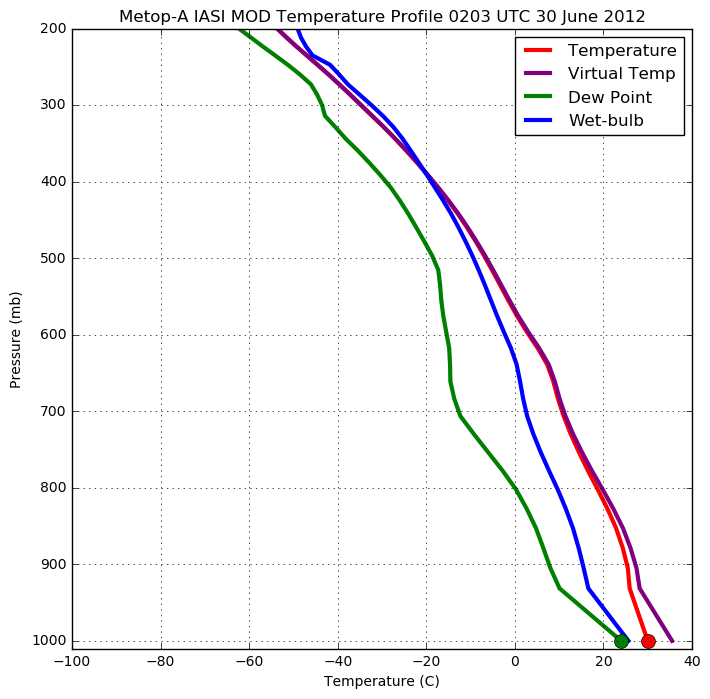

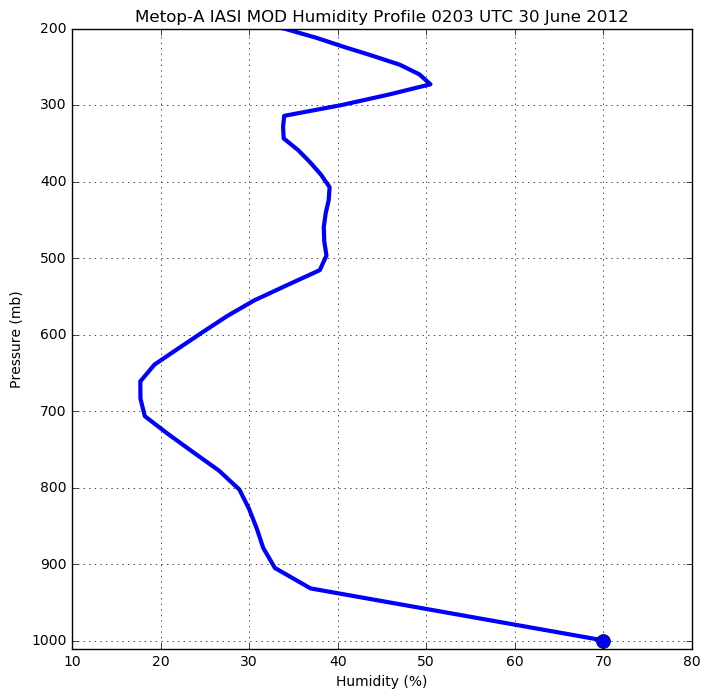

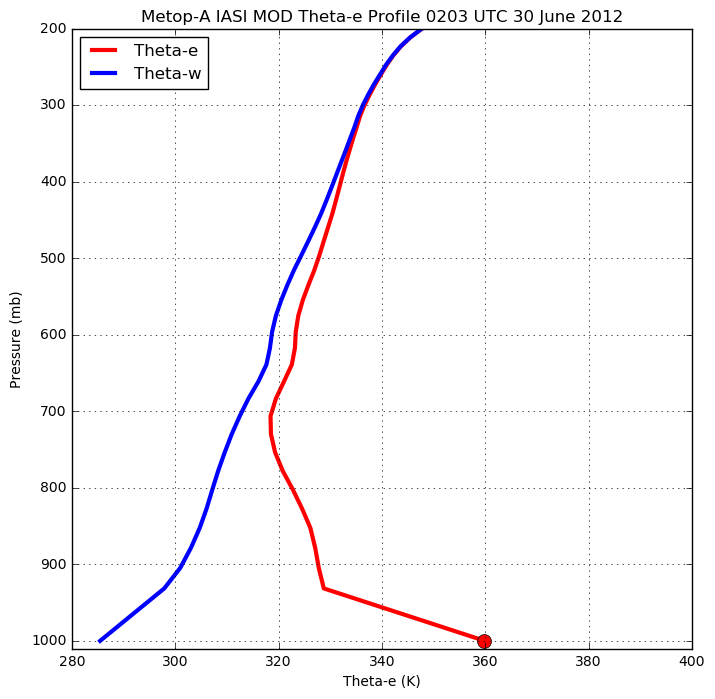

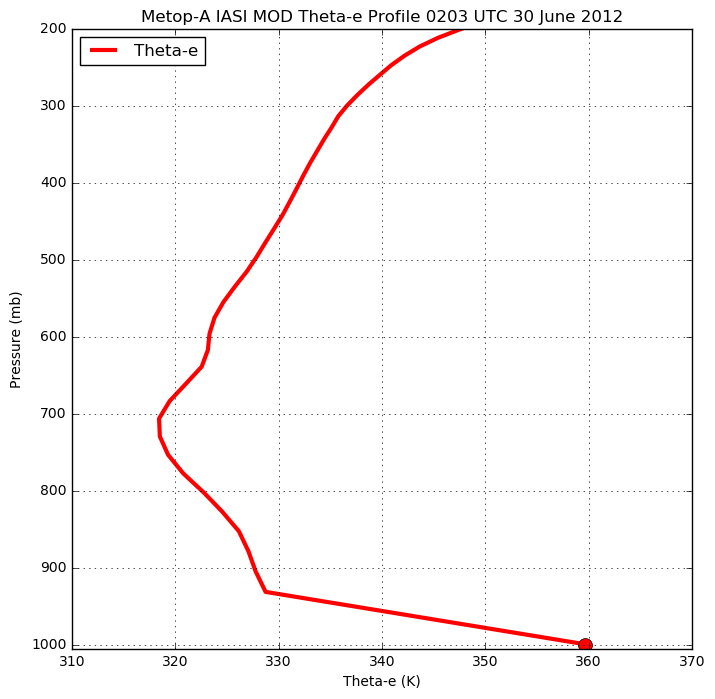

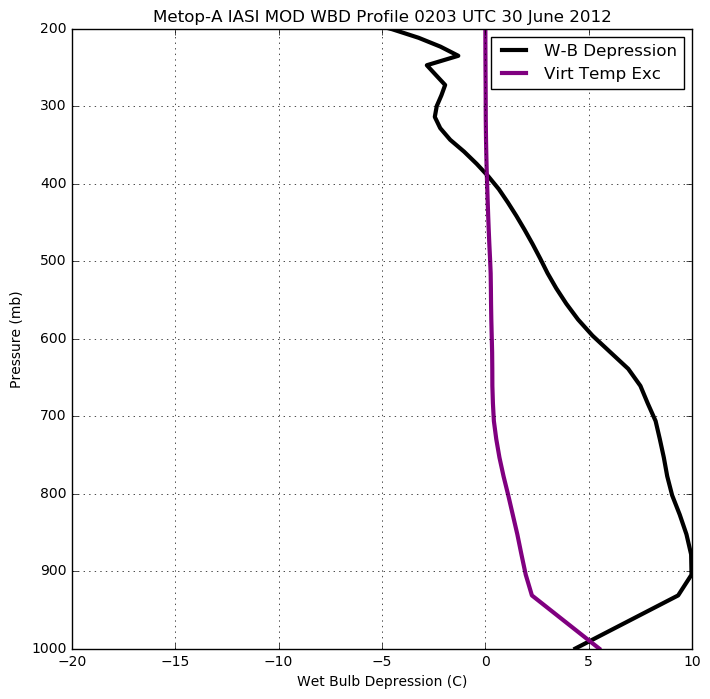

In [6]:
temperature_sfc = 30
dewpoint_sfc = 24
humidity_sfc = 70
pressure_sfc = 1000
thetae_sfc = (273.15 + temperature_sfc)*((1000/pressure_sfc)**0.286)+(3 * (humidity_sfc * (3.884266 * 10**
         ((7.5 * temperature_sfc)/(237.7 + temperature_sfc)))/100))
fig = plt.figure(figsize=(8,8))
plt.plot(temperature_c,pressure_pa,color='red',linewidth=3,label='Temperature')
plt.plot(tempvirt_c,pressure_pa,color='purple',linewidth=3,label='Virtual Temp')
plt.plot(dewpoint_c,pressure_pa,color='green',linewidth=3,label='Dew Point')
plt.plot(wetbulb,pressure_pa,color='blue',linewidth=3,label='Wet-bulb')
plt.plot(temperature_sfc,pressure_sfc,'ro',markersize=10)
plt.plot(dewpoint_sfc,pressure_sfc,'go',markersize=10)
plt.ylim(1010,200)
plt.ylabel("Pressure (mb)")
plt.xlabel("Temperature (C)")
plt.title("Metop-A IASI MOD Temperature Profile 0203 UTC 30 June 2012")
plt.grid(True)
plt.legend(loc='upper right')
plt.savefig("iasi_mod_temp_press_0203.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(8,8))
plt.plot(RH,pressure_pa,color='blue',linewidth=3)
plt.plot(humidity_sfc,pressure_sfc,'bo',markersize=10)
plt.ylim(1010,200)
plt.ylabel("Pressure (mb)")
plt.xlabel("Humidity (%)")
plt.title("Metop-A IASI MOD Humidity Profile 0203 UTC 30 June 2012")
plt.grid(True)
plt.savefig("iasi_mod_humidity_press_0203.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(8,8))
plt.plot(thetae,pressure_pa,color='red',linewidth=3,label='Theta-e')
plt.plot(thetaw,pressure_pa,color='blue',linewidth=3,label='Theta-w')
plt.plot(thetae_sfc,pressure_sfc,'ro',markersize=10)
plt.ylim(1010,200)
plt.ylabel("Pressure (mb)")
plt.xlabel("Theta-e (K)")
plt.title("Metop-A IASI MOD Theta-e Profile 0203 UTC 30 June 2012")
plt.grid(True)
plt.legend(loc='upper left')
plt.savefig("iasi_mod_thtae_press_0203.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(8,8))
plt.plot(thetae,pressure_pa,color='red',linewidth=3,label='Theta-e')
plt.plot(thetae_sfc,pressure_sfc,'ro',markersize=10)
plt.xlim(310,370)
plt.ylim(1005,200)
plt.ylabel("Pressure (mb)")
plt.xlabel("Theta-e (K)")
plt.title("Metop-A IASI MOD Theta-e Profile 0203 UTC 30 June 2012")
plt.grid(True)
plt.legend(loc='upper left')
plt.savefig("iasi_mod_thtae_0203.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(8,8))
plt.plot(WBD,pressure_pa,color='black',linewidth=3,label='W-B Depression')
plt.plot(tempvirt_exc,pressure_pa,color='purple',linewidth=3,label='Virt Temp Exc')
plt.ylim(1000,200)
plt.ylabel("Pressure (mb)")
plt.xlabel("Wet Bulb Depression (C)")
plt.title("Metop-A IASI MOD WBD Profile 0203 UTC 30 June 2012")
plt.grid(True)
plt.legend(loc='upper right')
plt.savefig("iasi_mod_wbd_press_0203.png",dpi=250,bbox_inches='tight')
plt.show()

('PUP idx = ', (array([10]),))
('PLO idx = ', (array([0]),))

---- Lifted Parcel Quantities ----
Parcel: MU
Ps  :1000.0hPa
TCs :  30.0C
TDs :  24.0C
-------------
Plcl: 917.2hPa
Tlcl:  22.6C
Plfc: 785.4hPa
P_el: 147.1hPa
CAPE:3482.6J
CIN: -131.0J


skewt/SkewT.py:672: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  dwpt[dwpt.mask]=-200


(1000.0, 30.0, 24.0, 'mu')
('CAPE = ', 3482.5586563199504)
Figure saved


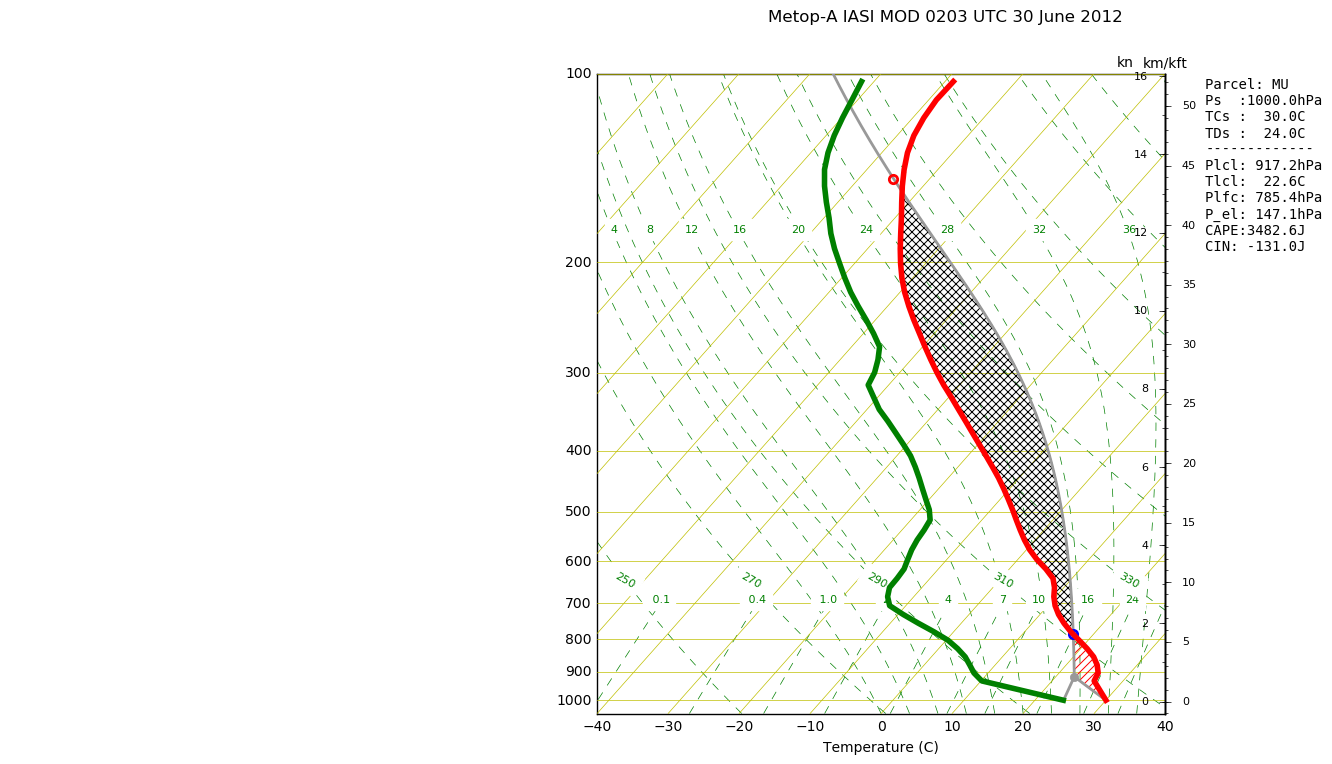

('Z_UP = ', array([ 3.]))
('P_UP = ', array([ 706.5]))
('T_UP = ', array([ 284.17188]))
('TD_UP = ', array([ 260.8688]))
('Z_LO = ', array([ 0.]))
('P_LO = ', array([ 1000.]))
('T_LO = ', array([ 303.15]))
('TD_LO = ', array([ 297.15]))
('DD_UP = ', array([ 23.30308]))
('DD_LO = ', array([ 6.]))
('DDD = ', 0)
('Gamma = ', array([ 6.32604]))
('MWPI_IRv1 = ', array([ 41.15162656]))
('WGP_IR = ', array([ 47.50533557]))
('MWPI_IRv2 = ', array([ 4.74776666]))
('WGP_IRv2 = ', array([ 47.9583036]))
('T_UP_mid = ', array([ 11.02188]))
('T_LO_mid = ', array([ 25.92812]))
('TD_LO_mid = ', array([ 283.24774]))
('Tdiff = ', array([ 14.90624]))
('DD_LO = ', array([-257.31962]))
('ST = ', 3)
('MT = ', 1)
('HI = ', 4)
('Tdiff = ', array([ 18.97812]))
('DD_LO = ', array([ 6.]))
('ST = ', 2)
('MT = ', 1)
('HI = ', 3)
('Tdiff = ', array([ 14.90624]))
('DD_LO = ', array([-257.31962]))
('ST = ', 3)
('MT = ', 1)
('HI = ', 4)
('Haines Index MID = ', 4)
('Haines Index HIGH = ', 3)
('C-Haines Index = ', 4)

-

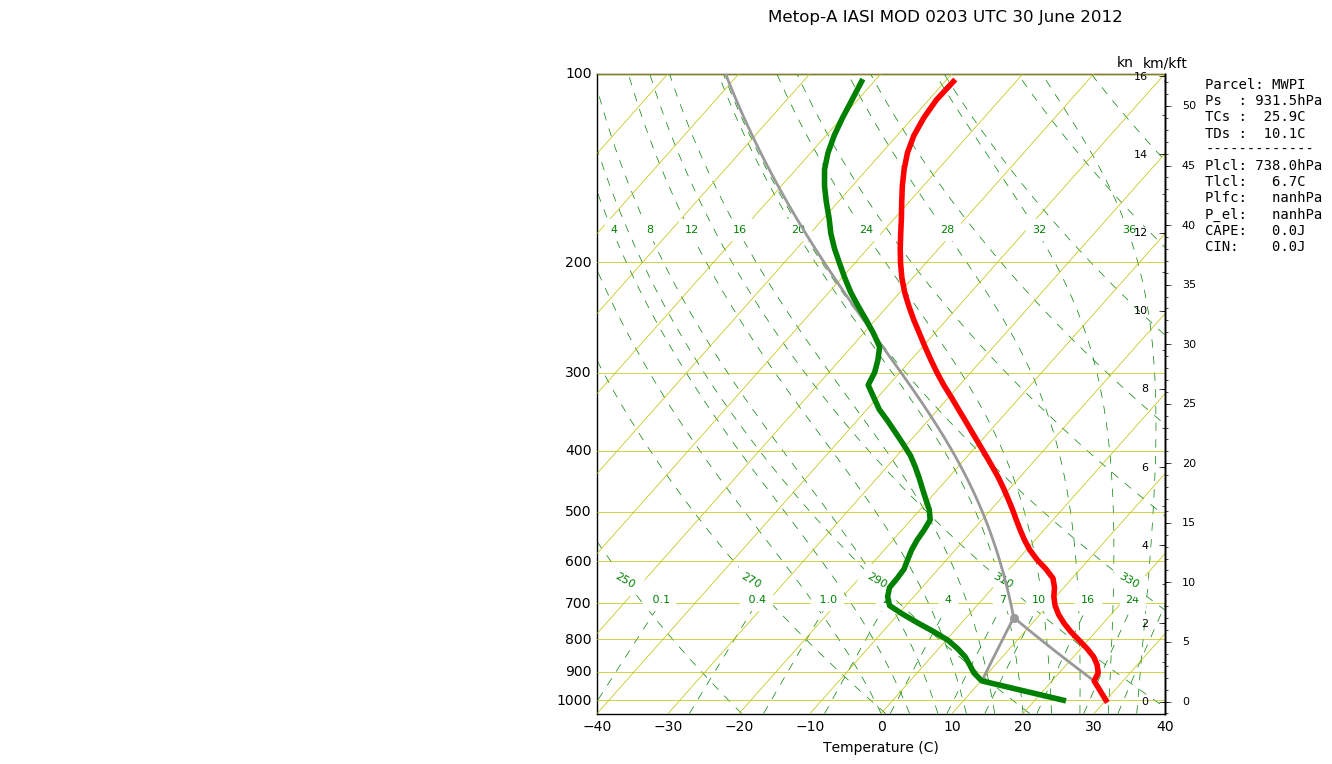


---- Lifted Parcel Quantities ----
Parcel: MU
Ps  :1000.0hPa
TCs :  30.0C
TDs :  24.0C
-------------
Plcl: 917.2hPa
Tlcl:  22.6C
Plfc: 785.4hPa
P_el: 147.1hPa
CAPE:3482.6J
CIN: -131.0J
Figure saved


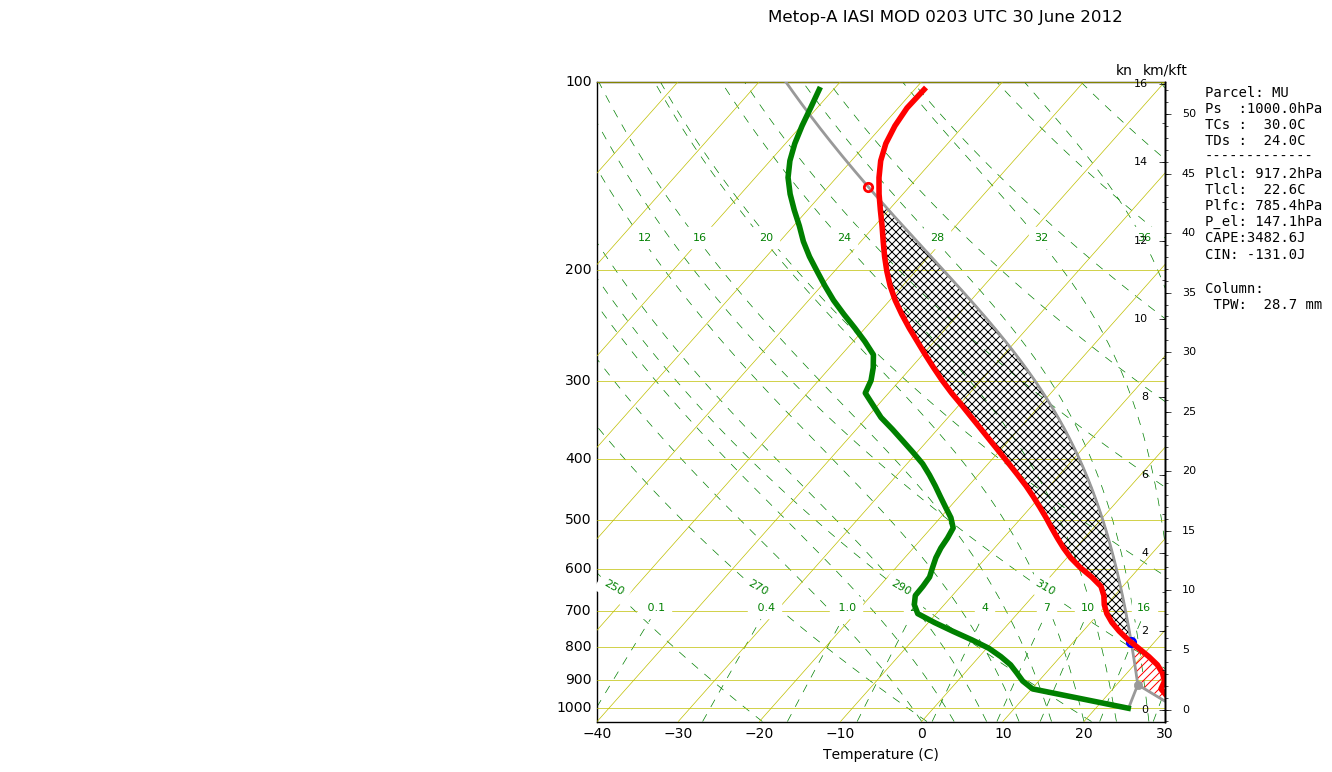

In [7]:
idx_pup = np.where(press == 706.5)
idx_plo = np.where(press == 1000.0)
print("PUP idx = ", idx_pup)
print("PLO idx = ", idx_plo)

S=SkewT.Sounding(soundingdata=mydata)
S.make_skewt_axes(tmin=-40.,tmax=40.,pmin=100.,pmax=1050.)
S.add_profile()
parcel=S.get_parcel(method='mu')
S.lift_parcel(*parcel)
print(parcel)
P_lcl,P_lfc,P_el,CAPE,CIN=S.get_cape(*parcel)
print("CAPE = ",CAPE)
fig.suptitle('Metop-A IASI MOD 0203 UTC 30 June 2012')
plt.suptitle('Metop-A IASI MOD 0203 UTC 30 June 2012',size=12)
plt.savefig("skewt_iasi_mod_0630_0203_mu.png",dpi=250,bbox_inches='tight')
print("Figure saved")
plt.show()

#Compute the Microburst Windspeed Potential Index (MWPI)
Z_UP = height_km[idx_pup]
print("Z_UP = ", Z_UP)
P_UP = press[idx_pup]
print("P_UP = ", P_UP)
T_UP = temp[idx_pup]
print("T_UP = ", T_UP)
TD_UP = dewpt[idx_pup]
print("TD_UP = ", TD_UP)
Z_LO = height_km[idx_plo]
print("Z_LO = ", Z_LO)
P_LO = press[idx_plo]
print("P_LO = ", P_LO)
T_LO = temp[idx_plo]
print("T_LO = ", T_LO)
TD_LO = dewpt[idx_plo]
print("TD_LO = ", TD_LO)

def MWPI(Z_UP, Z_LO, T_UP, T_LO, TD_UP, TD_LO, CAPE):
    gamma = (T_LO - T_UP)/(Z_UP - Z_LO)
    DD_UP = T_UP - TD_UP
    print("DD_UP = ", DD_UP)
    DD_LO = T_LO - TD_LO
    print("DD_LO = ", DD_LO)
    DDD = DD_LO - DD_UP
    if DDD < 0:
        DDD = 0
    print("DDD = ", DDD)
    MWPI_IRv1 = (CAPE/100) + gamma + DDD
    MWPI_IRv2 = (CAPE/1000) + (gamma/5) + (DDD/5)
    WGP_IR = (0.4553 * MWPI_IRv1) + 28.769
    WGP_IRv2 = (0.35435365777*(MWPI_IRv2**2)) + (1.29598552473*MWPI_IRv2) + 33.8176788073
    return gamma, MWPI_IRv1, MWPI_IRv2, WGP_IR, WGP_IRv2
    
gamma, MWPI_IRv1, MWPI_IRv2, WGP_IR, WGP_IRv2 = MWPI(Z_UP, Z_LO, T_UP, T_LO, TD_UP, TD_LO, CAPE)

print("Gamma = ", gamma)
print("MWPI_IRv1 = ", MWPI_IRv1)
print("WGP_IR = ", WGP_IR)
print("MWPI_IRv2 = ", MWPI_IRv2)
print("WGP_IRv2 = ", WGP_IRv2)

def Haines_H(T_UP, T_LO, TD_LO):
    Tdiff = T_LO - T_UP
    print("Tdiff = ", Tdiff)
    DD_LO = T_LO - TD_LO
    print("DD_LO = ", DD_LO)
    if Tdiff < 17:
        ST = 1
    elif Tdiff >= 17 and Tdiff <= 21:
        ST = 2
    else:
        ST = 3   
    if DD_LO < 14:
        MT = 1
    elif DD_LO >= 14 and DD_LO <= 20:
        MT = 2
    else:    
        MT = 3
    HI = ST + MT    
    print("ST = ", ST)
    print("MT = ", MT)
    print("HI = ", HI)
    return HI
 
def Haines_M(T_UP, T_LO, TD_LO):
    Tdiff = T_LO - T_UP
    print("Tdiff = ", Tdiff)
    DD_LO = T_LO - TD_LO
    print("DD_LO = ", DD_LO)
    if Tdiff < 5:
        ST = 1
    elif Tdiff >= 5 and Tdiff <= 10:
        ST = 2
    else:
        ST = 3   
    if DD_LO < 5:
        MT = 1
    elif DD_LO >= 5 and DD_LO <= 12:
        MT = 2
    else:    
        MT = 3
    HI = ST + MT    
    print("ST = ", ST)
    print("MT = ", MT)
    print("HI = ", HI)
    return HI
        
def C_Haines(T_UP, T_LO, TD_LO):
    Tdiff = T_LO - T_UP
    print("Tdiff = ", Tdiff)
    DD_LO = T_LO - TD_LO
    print("DD_LO = ", DD_LO)
    if DD_LO >30:
        DD_LO=30
    CA=((T_LO-T_UP)/2)-2
    CB=((DD_LO)/3)-1
    if CB>5:
        CB=5+(CB-5)/2
    CH=CA+CB
    return CH

idx_pup_mid = np.where(press == 706.5)
idx_plo_mid = np.where(press == 931.5)
T_UP_mid = temperature_c[idx_pup_mid]
print("T_UP_mid = ", T_UP_mid)
T_LO_mid = temperature_c[idx_plo_mid]
print("T_LO_mid = ", T_LO_mid)
TD_LO_mid = dewpt[idx_plo_mid]
print("TD_LO_mid = ", TD_LO_mid)
    
HI_M = Haines_M(T_UP_mid, T_LO_mid, TD_LO_mid)
HI_H = Haines_H(T_UP, T_LO, TD_LO)
CH = Haines_M(T_UP_mid, T_LO_mid, TD_LO_mid)
    
print("Haines Index MID = ", HI_M)
print("Haines Index HIGH = ", HI_H)
print("C-Haines Index = ", CH)

idx_plo = np.where(press == 931.5)
temp_p2 = temperature_c[idx_plo]
dewpt_p2 = dewpoint_c[idx_plo]

fig = plt.figure(figsize=(8, 8))
parcel_2=(931.5, temp_p2, dewpt_p2, 'mwpi')
S.make_skewt_axes(tmin=-40.,tmax=40.,pmin=100.,pmax=1050.)
S.add_profile()
S.lift_parcel(*parcel_2)
print(parcel_2)
P_lcl,P_lfc,P_el,CAPE,CIN=S.get_cape(*parcel_2)
print("CAPE = ",CAPE)
fig.suptitle('Metop-A IASI MOD 0203 UTC 30 June 2012')
plt.suptitle('Metop-A IASI MOD 0203 UTC 30 June 2012',size=12)
plt.savefig("skewt_mwpi_iasi_mod_0630_0203.png",dpi=250,bbox_inches='tight')
print("Figure saved")
plt.show()

fig = plt.figure(figsize=(8, 8))
S.plot_skewt()
fig.suptitle('Metop-A IASI MOD 0203 UTC 30 June 2012')
plt.suptitle('Metop-A IASI MOD 0203 UTC 30 June 2012',size=12,horizontalalignment='center',verticalalignment='center')
plt.savefig("skewt_metop_iasi_mod_0203.png",dpi=250,bbox_inches='tight')
print("Figure saved")
plt.show()

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from skewt import SkewT
import re
from six import StringIO

'''
Metop-A IASI MOD T_V Profile at 0203 UTC 30 June 2012
'''

press = "0 . 0 1 6   0 . 0 3 8   0 . 0 7 6   0 . 1 3 6   0 . 2 2 4   0 . 3 4 5   0 . 5 0 6   0 . 7 1 3   0 . 9 7 5   1 . 2 9 7   1 . 6 8 7   2 . 1 5 2   2 . 7   3 . 3 3 9   4 . 0 7 7   4 . 9 2   5 . 8 7 7   6 . 9 5 6   8 . 1 6 5   9 . 5 1 1   1 1 . 0   1 2 . 6   1 4 . 4   1 6 . 4   1 8 . 5   2 0 . 9   2 3 . 4   2 6 . 1   2 9 . 1   3 2 . 2   3 5 . 6   3 9 . 2   4 3 . 1   4 7 . 1   5 1 . 5   5 6 . 1   6 0 . 9   6 6 . 1   7 1 . 5   7 7 . 2   8 3 . 2   8 9 . 5   9 6 . 1   1 0 3 . 0   1 1 0 . 2   1 1 7 . 7   1 2 5 . 6   1 3 3 . 8   1 4 2 . 3   1 5 1 . 2   1 6 0 . 4   1 7 0 . 0   1 8 0 . 0   1 9 0 . 3   2 0 0 . 9   2 1 2 . 0   2 2 3 . 4   2 3 5 . 2   2 4 7 . 4   2 5 9 . 9   2 7 2 . 9   2 8 6 . 2   3 0 0 . 0   3 1 4 . 1   3 2 8 . 6   3 4 3 . 6   3 5 8 . 9   3 7 4 . 7   3 9 0 . 8   4 0 7 . 4   4 2 4 . 4   4 4 1 . 8   4 5 9 . 7   4 7 7 . 9   4 9 6 . 6   5 1 5 . 7   5 3 5 . 2   5 5 5 . 1   5 7 5 . 5   5 9 6 . 3   6 1 7 . 5   6 3 9 . 1   6 6 1 . 1   6 8 3 . 6   7 0 6 . 5   7 2 9 . 8   7 5 3 . 6   7 7 7 . 7   8 0 2 . 3   8 2 7 . 3   8 5 2 . 7   8 7 8 . 6   9 0 4 . 8   9 3 1 . 5   1 0 0 0 . 0"
temp = "1 9 3 . 3 1 2 5   2 0 5 . 9 3 7 5   2 1 8 . 8 5 9 3 8   2 3 1 . 7 3 4 3 8   2 4 2 . 1 2 5   2 5 2 . 2 6 5 6 2   2 6 0 . 4 2 1 8 8   2 6 6 . 0 4 6 8 8   2 6 9 . 2 8 1 2 5   2 7 0 . 5 6 2 5   2 6 8 . 7 8 1 2 5   2 6 6 . 2 6 5 6 2   2 6 1 . 8 9 0 6 2   2 5 6 . 6 8 7 5   2 5 1 . 8 9 0 6 2   2 4 7 . 1 0 9 3 8   2 4 2 . 4 3 7 5   2 3 8 . 8 2 8 1 2   2 3 6 . 1 7 1 8 8   2 3 4 . 0 7 8 1 2   2 3 1 . 5 9 3 7 5   2 2 9 . 3 1 2 5   2 2 7 . 5   2 2 6 . 1 0 9 3 8   2 2 4 . 9 2 1 8 8   2 2 3 . 5 1 5 6 2   2 2 2 . 1 2 5   2 2 0 . 7 5   2 1 9 . 4 2 1 8 8   2 1 8 . 2 3 4 3 8   2 1 7 . 2 9 6 8 8   2 1 6 . 5 9 3 7 5   2 1 5 . 8 2 8 1 2   2 1 4 . 7 3 4 3 8   2 1 3 . 5 7 8 1 2   2 1 2 . 7 1 8 7 5   2 1 2 . 0 6 2 5   2 1 1 . 4 6 8 7 5   2 1 0 . 7 9 6 8 8   2 0 9 . 5 9 3 7 5   2 0 8 . 0 6 2 5   2 0 6 . 5   2 0 5 . 2 5   2 0 4 . 3 2 8 1 2   2 0 4 . 2 3 4 3 8   2 0 4 . 7 0 3 1 2   2 0 5 . 5 1 5 6 2   2 0 6 . 7 6 5 6 2   2 0 8 . 3 9 0 6 2   2 1 0 . 2 0 3 1 2   2 1 2 . 1 2 5   2 1 4 . 0 6 2 5   2 1 5 . 9 0 6 2 5   2 1 7 . 7 3 4 3 8   2 1 9 . 6 2 5   2 2 1 . 6 4 0 6 2   2 2 3 . 8 1 2 5   2 2 6 . 1 5 6 2 5   2 2 8 . 5 7 8 1 2   2 3 1 . 0 4 6 8 8   2 3 3 . 4 8 4 3 8   2 3 5 . 9 2 1 8 8   2 3 8 . 3 9 0 6 2   2 4 0 . 9 0 6 2 5   2 4 3 . 5 1 5 6 2   2 4 6 . 0 4 6 8 8   2 4 8 . 5 3 1 2 5   2 5 0 . 9 6 8 7 5   2 5 3 . 3 5 9 3 8   2 5 5 . 7 1 8 7 5   2 5 8 . 0 1 5 6 2   2 6 0 . 2 3 4 3 8   2 6 2 . 3 1 2 5   2 6 4 . 2 8 1 2 5   2 6 6 . 1 8 7 5   2 6 8 . 0   2 6 9 . 8 1 2 5   2 7 1 . 6 5 6 2 5   2 7 3 . 6 2 5   2 7 5 . 8 4 3 7 5   2 7 8 . 2 9 6 8 8   2 8 0 . 4 6 8 7 5   2 8 1 . 8 2 8 1 2   2 8 2 . 8 7 5   2 8 4 . 1 7 1 8 8   2 8 5 . 7 6 5 6 2   2 8 7 . 6 2 5   2 8 9 . 6 5 6 2 5   2 9 1 . 8 7 5   2 9 4 . 0 4 6 8 8   2 9 6 . 0   2 9 7 . 5 1 5 6 2   2 9 8 . 6 5 6 2 5   2 9 9 . 0 7 8 1 2   3 0 3 . 1 5"
dewpt = "1 4 9 . 4 6 6 1   1 5 2 . 4 0 1 7   1 5 5 . 3 7 8 4 8   1 5 7 . 8 4 2 1 3   1 5 9 . 9 2 8 5   1 6 1 . 9 6 4 5 4   1 6 3 . 7 6 9 7   1 6 5 . 3 3 4 6 7   1 6 6 . 6 7 7 9 5   1 6 7 . 9 3 7 5 3   1 6 9 . 1 0 4 3 2   1 7 0 . 1 9 1 3 6   1 7 1 . 2 9 8 5 4   1 7 2 . 3 3 4 7 2   1 7 3 . 2 8 5 8   1 7 4 . 1 8 8 1 4   1 7 5 . 0 3 6 7 6   1 7 5 . 8 4 9 0 4   1 7 6 . 6 5 2 0 2   1 7 7 . 4 2 0 2 6   1 7 8 . 1 3 1 5 8   1 7 8 . 8 3 7 5 9   1 7 9 . 4 9 8 9 8   1 8 0 . 1 1 6 4 7   1 8 0 . 6 8 9 7 6   1 8 1 . 2 7 3 1 6   1 8 1 . 8 3 8 6 4   1 8 2 . 3 9 3 9   1 8 2 . 9 5 2 2 6   1 8 3 . 4 7 2 8 1   1 8 3 . 9 8 7 6 1   1 8 4 . 4 8 8 6 6   1 8 4 . 9 6 6 2 8   1 8 5 . 4 4 4 2 7   1 8 5 . 8 9 8 6 7   1 8 6 . 3 3 6   1 8 6 . 7 7 6 5 7   1 8 7 . 1 9 9 3 9   1 8 7 . 6 2 7 9 8   1 8 8 . 4 1 4 3 2   1 8 9 . 1 6 2 0 5   1 8 9 . 8 9 0 6 9   1 9 0 . 5 9 1 2   1 9 1 . 3 9 8 2 2   1 9 2 . 3 4 9 7   1 9 3 . 2 5 4 2 6   1 9 4 . 2 9 7 0 3   1 9 5 . 5 7 4 3 1   1 9 7 . 1 8 1 0 5   1 9 9 . 2 4 2 9 5   2 0 1 . 5 0 9 5   2 0 3 . 8 6 8 9 9   2 0 6 . 0 6 6 5 1   2 0 8 . 4 7 5 1 7   2 1 1 . 0 3 3 8 4   2 1 3 . 6 0 4 8   2 1 6 . 2 1 3 4   2 1 9 . 0 2 0 4   2 2 1 . 8 7 4 6 3   2 2 4 . 5 7 9 8 3   2 2 7 . 0 8 9 5   2 2 8 . 4 8 0 7   2 2 9 . 6 1 0 6 9   2 3 0 . 2 6 8 0 4   2 3 2 . 5 8 3 4 8   2 3 4 . 8 8 0 1 1   2 3 7 . 5 8 5 5   2 4 0 . 1 6 3 7 3   2 4 2 . 6 6 9 7   2 4 5 . 0 8 2 3   2 4 7 . 1 3 6 6   2 4 9 . 0 4 9 0 7   2 5 0 . 8 6 6 5   2 5 2 . 6 6 1 9 6   2 5 4 . 4 5 9   2 5 5 . 8 6 0 9 6   2 5 6 . 2 7 1 2 7   2 5 6 . 5 3 6 1 3   2 5 6 . 9 9 2 7 7   2 5 7 . 6 4 5 7 5   2 5 8 . 3 1 9 1 8   2 5 8 . 5 1 5 5   2 5 8 . 5 8 8 8 7   2 5 9 . 4 6 2 6   2 6 0 . 8 6 8 8   2 6 3 . 8 8 6 6 6   2 6 7 . 1 0 4 5 5   2 7 0 . 3 7 9 9   2 7 3 . 4 1 6 2   2 7 5 . 8 0 9 2   2 7 7 . 9 0 8 1 4   2 7 9 . 5 7 0 9 5   2 8 1 . 1 6 3 8 2   2 8 3 . 2 4 7 7 4   2 9 7 . 1 5"

print(press)
press = re.sub(r'\s(\.)\s+(\d)', r'\1\2', press)
press = re.sub('(?<=\d) (?=\d)', '', press)
press = re.sub(r'\s+\s', r' ', press)
print(press)
press = np.fromstring(press,dtype=float,sep=' ')
print(press,press.shape)
idx_p100 = np.where(press == 103.0)
print("Index press = 100: ", idx_p100)
print("Index press = 100: ", idx_p100[0])
print("Index press = 100: ", idx_p100[0][0])
press = press[idx_p100[0][0]:]
press = press[::-1]
print(len(press))
print(press,press.shape)

print(temp)
temp = re.sub(r'\s(\.)\s+(\d)', r'\1\2', temp)
temp = re.sub('(?<=\d) (?=\d)', '', temp)
temp = re.sub(r'\s+\s', r' ', temp)
print(temp)
temp = np.fromstring(temp,dtype=float,sep=' ')
print(temp,temp.shape)
temp = temp[idx_p100[0][0]:]
temp = temp[::-1]
print(len(temp))
print(temp,temp.shape)

print(dewpt)
dewpt = re.sub(r'\s(\.)\s+(\d)', r'\1\2', dewpt)
dewpt = re.sub('(?<=\d) (?=\d)', '', dewpt)
dewpt = re.sub(r'\s+\s', r' ', dewpt)
print(dewpt)
dewpt = np.fromstring(dewpt,dtype=float,sep=' ')
print(dewpt,dewpt.shape)
dewpt = dewpt[idx_p100[0][0]:]
dewpt = dewpt[::-1]
print(len(dewpt))
print(dewpt,dewpt.shape)
data_txt = '''
0.0
0.7
1
1.25
1.5
1.75
2
2.25
2.5
2.75
3
3.2
3.5
3.7
4
4.25
4.5
4.8
5
5.5
5.7
6
6.2
6.5
6.75
7
7.5
7.7
8
8.25
8.5
8.8
9
9.5
9.8
10
10.5
10.75
11
11.5
11.75
12
12.5
13
13.25
13.5
14
14.5
15
15.25
15.5
16
'''
height_km = StringIO(data_txt)
height_km = np.loadtxt(height_km, usecols=range(0, 0), unpack=True)
height_m = height_km * 1000
print(height_m,len(height_m))
height_km = height_m/1000
print(height_km,len(height_km))
pressure_pa = press
temperature_c = temp-273.15 
dewpoint_c = dewpt-273.15 
RH = 100*(np.exp((17.625*dewpoint_c)/(243.04+dewpoint_c))/np.exp((17.625*temperature_c)/(243.04+temperature_c)))
L_vapor = 2500

thetae = (273.15 + temperature_c)*((1000/pressure_pa)**0.286)+(3 * (RH * (3.884266 * 10**
         ((7.5 * temperature_c)/(237.7 + temperature_c)))/100))
wetbulb = temperature_c*(np.arctan(0.151977*((RH+8.313659)**0.5))) + (np.arctan(temperature_c+RH)) - (np.arctan(RH-1.676331))+((0.00391838*(RH**1.5))*(np.arctan(0.023101*RH))) - 4.686035
WBD = temperature_c - wetbulb
satmixrat = (6.11*(10**((7.5*temperature_c)/(237.7+temperature_c))))/1000
print("Sat_mix_ratio = ",satmixrat)
mixrat = (6.11*(10**((7.5*dewpoint_c)/(237.7+dewpoint_c))))/1000
print("Mix_ratio = ",mixrat)
thetaw = thetae - (L_vapor*mixrat)
tempvirt = temp*(1+(0.61*(mixrat)))
tempvirt_c = tempvirt - 273.15
print("Virtual Temperature (C) = ",tempvirt_c)
tempvirt_exc = tempvirt_c - temperature_c

idx_pup = np.where(press == 706.5)
idx_plo = np.where(press == 1000.0)
print("PUP idx = ", idx_pup)
print("PLO idx = ", idx_plo)
T_sfc = tempvirt[idx_plo]
T_top = tempvirt[idx_pup]
wetbulb_sfc = wetbulb[idx_plo]
wetbulb_top = wetbulb[idx_pup]
thetaw_sfc = thetaw[idx_pup]
delta_z = 3000
delta_zkm = 3.0
gamma = (T_sfc - T_top)/(delta_zkm)
gamma_wb = (wetbulb_sfc - wetbulb_top)/(delta_zkm)
DCAPE = 0.5 * 9.81 * ((T_sfc-thetaw_sfc)/T_sfc) * delta_z
W_max = ((2*DCAPE)**0.5)*1.94384
 
mydata=dict(zip(('hght','pres','temp','dwpt','thtae','thetaw','wetbulb','depression','tempvirt','tempvirt_exc'),(height_m,pressure_pa,tempvirt_c,dewpoint_c,thetae,thetaw,wetbulb,WBD,tempvirt_c,tempvirt_exc)))
print(mydata)

print("Gamma = ", gamma)
print("Wetbulb Gamma = ", gamma_wb)
print("DCAPE = ", DCAPE)
print("Downdraft Wmax = ", W_max)

0 . 0 1 6   0 . 0 3 8   0 . 0 7 6   0 . 1 3 6   0 . 2 2 4   0 . 3 4 5   0 . 5 0 6   0 . 7 1 3   0 . 9 7 5   1 . 2 9 7   1 . 6 8 7   2 . 1 5 2   2 . 7   3 . 3 3 9   4 . 0 7 7   4 . 9 2   5 . 8 7 7   6 . 9 5 6   8 . 1 6 5   9 . 5 1 1   1 1 . 0   1 2 . 6   1 4 . 4   1 6 . 4   1 8 . 5   2 0 . 9   2 3 . 4   2 6 . 1   2 9 . 1   3 2 . 2   3 5 . 6   3 9 . 2   4 3 . 1   4 7 . 1   5 1 . 5   5 6 . 1   6 0 . 9   6 6 . 1   7 1 . 5   7 7 . 2   8 3 . 2   8 9 . 5   9 6 . 1   1 0 3 . 0   1 1 0 . 2   1 1 7 . 7   1 2 5 . 6   1 3 3 . 8   1 4 2 . 3   1 5 1 . 2   1 6 0 . 4   1 7 0 . 0   1 8 0 . 0   1 9 0 . 3   2 0 0 . 9   2 1 2 . 0   2 2 3 . 4   2 3 5 . 2   2 4 7 . 4   2 5 9 . 9   2 7 2 . 9   2 8 6 . 2   3 0 0 . 0   3 1 4 . 1   3 2 8 . 6   3 4 3 . 6   3 5 8 . 9   3 7 4 . 7   3 9 0 . 8   4 0 7 . 4   4 2 4 . 4   4 4 1 . 8   4 5 9 . 7   4 7 7 . 9   4 9 6 . 6   5 1 5 . 7   5 3 5 . 2   5 5 5 . 1   5 7 5 . 5   5 9 6 . 3   6 1 7 . 5   6 3 9 . 1   6 6 1 . 1   6 8 3 . 6   7 0 6 . 5   7 2 9 . 8   7 5 3 . 6   7 7 7 . 

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:148: RuntimeWarning: invalid value encountered in sqrt


('PUP idx = ', (array([10]),))
('PLO idx = ', (array([0]),))

---- Lifted Parcel Quantities ----
Parcel: MU
Ps  :1000.0hPa
TCs :  35.5C
TDs :  24.0C
-------------
Plcl: 848.3hPa
Tlcl:  21.3C
Plfc: 795.4hPa
P_el: 130.7hPa
CAPE:4784.0J
CIN:  -54.9J
(1000.0, 35.506036522630097, 24.0, 'mu')
('CAPE = ', 4784.0406087044612)
Figure saved


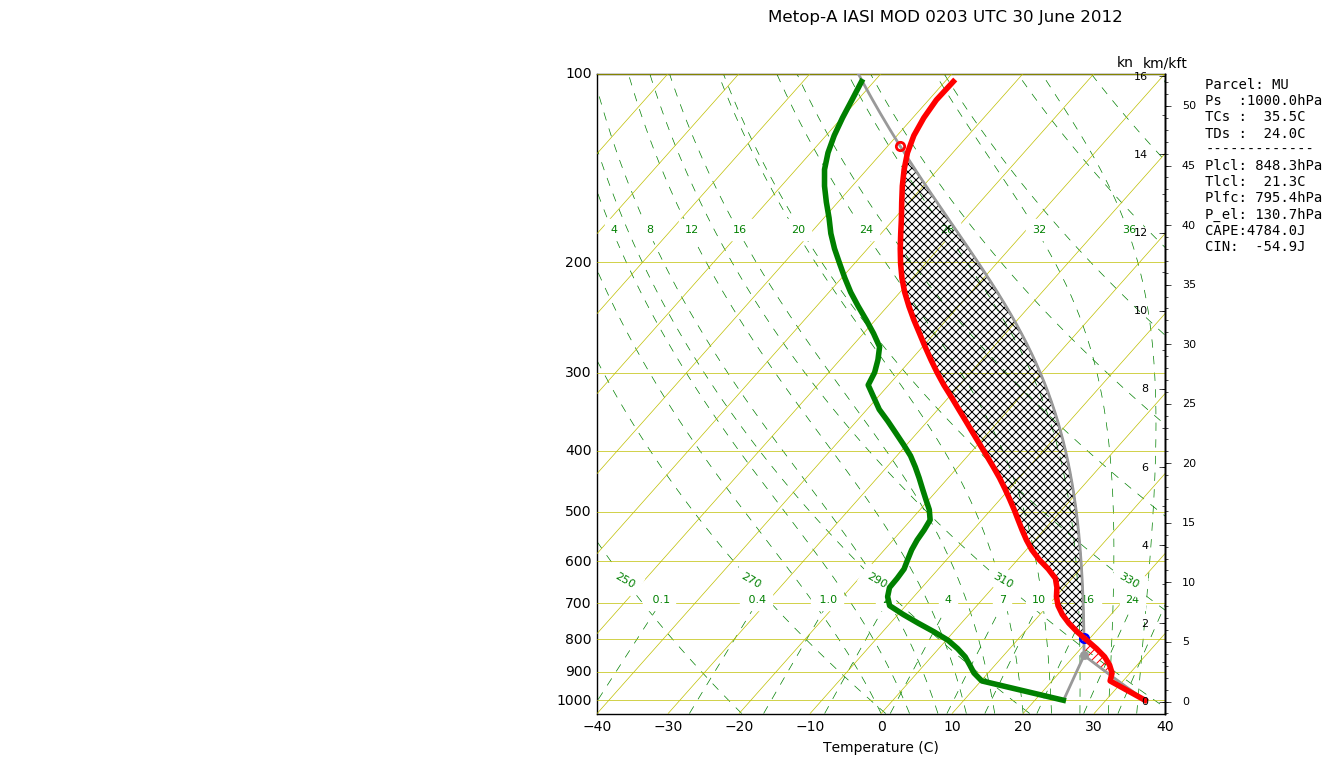

('Z_UP = ', array([ 3.]))
('P_UP = ', array([ 706.5]))
('T_UP = ', array([ 284.5852504]))
('TD_UP = ', array([ 260.8688]))
('Z_LO = ', array([ 0.]))
('P_LO = ', array([ 1000.]))
('T_LO = ', array([ 308.65603652]))
('TD_LO = ', array([ 297.15]))
('DD_UP = ', array([ 23.7164504]))
('DD_LO = ', array([ 11.50603652]))
('DDD = ', 0)
('Gamma = ', array([ 8.02359537]))
('MWPI_IRv1 = ', array([ 55.86400146]))
('WGP_IR = ', array([ 54.20387987]))
('MWPI_IRv2 = ', array([ 6.38875968]))
('WGP_IRv2 = ', array([ 56.56080647]))
('T_UP_mid = ', array([ 11.4352504]))
('T_LO_mid = ', array([ 28.18121833]))
('TD_LO_mid = ', array([ 283.24774]))
('Tdiff = ', array([ 16.74596793]))
('DD_LO = ', array([-255.06652167]))
('ST = ', 3)
('MT = ', 1)
('HI = ', 4)
('Tdiff = ', array([ 24.07078612]))
('DD_LO = ', array([ 11.50603652]))
('ST = ', 3)
('MT = ', 1)
('HI = ', 4)
('Tdiff = ', array([ 16.74596793]))
('DD_LO = ', array([-255.06652167]))
('ST = ', 3)
('MT = ', 1)
('HI = ', 4)
('Haines Index MID = ', 4)
('H

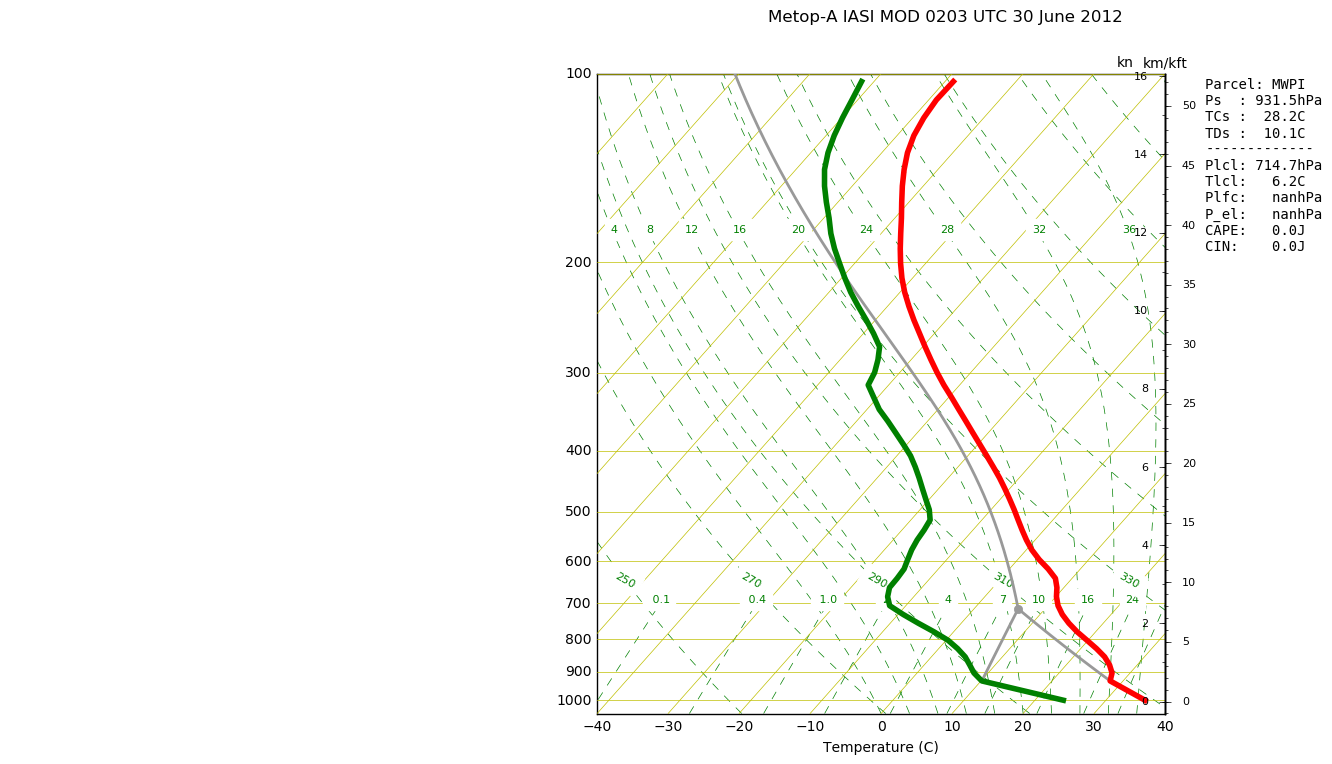


---- Lifted Parcel Quantities ----
Parcel: MU
Ps  :1000.0hPa
TCs :  35.5C
TDs :  24.0C
-------------
Plcl: 848.3hPa
Tlcl:  21.3C
Plfc: 795.4hPa
P_el: 130.7hPa
CAPE:4784.0J
CIN:  -54.9J
Figure saved


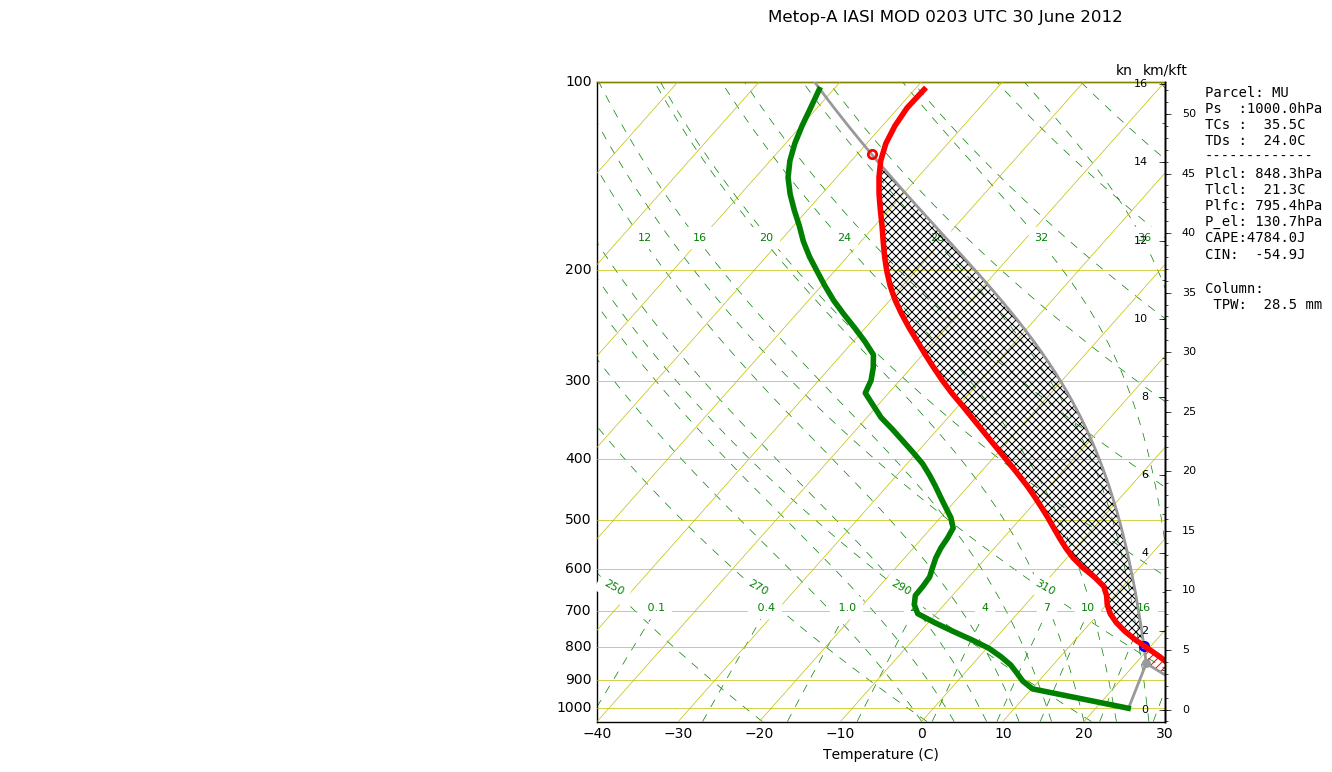

In [9]:
idx_pup = np.where(press == 706.5)
idx_plo = np.where(press == 1000.0)
print("PUP idx = ", idx_pup)
print("PLO idx = ", idx_plo)

S=SkewT.Sounding(soundingdata=mydata)
S.make_skewt_axes(tmin=-40.,tmax=40.,pmin=100.,pmax=1050.)
S.add_profile()
parcel=S.get_parcel(method='mu')
S.lift_parcel(*parcel)
print(parcel)
P_lcl,P_lfc,P_el,CAPE,CIN=S.get_cape(*parcel)
print("CAPE = ",CAPE)
fig.suptitle('Metop-A IASI MOD 0203 UTC 30 June 2012')
plt.suptitle('Metop-A IASI MOD 0203 UTC 30 June 2012',size=12)
plt.savefig("skewt_iasi_mod_tv_0630_0203_mu.png",dpi=250,bbox_inches='tight')
print("Figure saved")
plt.show()

#Compute the Microburst Windspeed Potential Index (MWPI)
Z_UP = height_km[idx_pup]
print("Z_UP = ", Z_UP)
P_UP = press[idx_pup]
print("P_UP = ", P_UP)
T_UP = tempvirt[idx_pup]
print("T_UP = ", T_UP)
TD_UP = dewpt[idx_pup]
print("TD_UP = ", TD_UP)
Z_LO = height_km[idx_plo]
print("Z_LO = ", Z_LO)
P_LO = press[idx_plo]
print("P_LO = ", P_LO)
T_LO = tempvirt[idx_plo]
print("T_LO = ", T_LO)
TD_LO = dewpt[idx_plo]
print("TD_LO = ", TD_LO)

def MWPI(Z_UP, Z_LO, T_UP, T_LO, TD_UP, TD_LO, CAPE):
    gamma = (T_LO - T_UP)/(Z_UP - Z_LO)
    DD_UP = T_UP - TD_UP
    print("DD_UP = ", DD_UP)
    DD_LO = T_LO - TD_LO
    print("DD_LO = ", DD_LO)
    DDD = DD_LO - DD_UP
    if DDD < 0:
        DDD = 0
    print("DDD = ", DDD)
    MWPI_IRv1 = (CAPE/100) + gamma + DDD
    MWPI_IRv2 = (CAPE/1000) + (gamma/5) + (DDD/5)
    WGP_IR = (0.4553 * MWPI_IRv1) + 28.769
    WGP_IRv2 = (0.35435365777*(MWPI_IRv2**2)) + (1.29598552473*MWPI_IRv2) + 33.8176788073
    return gamma, MWPI_IRv1, MWPI_IRv2, WGP_IR, WGP_IRv2
    
gamma, MWPI_IRv1, MWPI_IRv2, WGP_IR, WGP_IRv2 = MWPI(Z_UP, Z_LO, T_UP, T_LO, TD_UP, TD_LO, CAPE)

print("Gamma = ", gamma)
print("MWPI_IRv1 = ", MWPI_IRv1)
print("WGP_IR = ", WGP_IR)
print("MWPI_IRv2 = ", MWPI_IRv2)
print("WGP_IRv2 = ", WGP_IRv2)

def Haines_H(T_UP, T_LO, TD_LO):
    Tdiff = T_LO - T_UP
    print("Tdiff = ", Tdiff)
    DD_LO = T_LO - TD_LO
    print("DD_LO = ", DD_LO)
    if Tdiff < 17:
        ST = 1
    elif Tdiff >= 17 and Tdiff <= 21:
        ST = 2
    else:
        ST = 3   
    if DD_LO < 14:
        MT = 1
    elif DD_LO >= 14 and DD_LO <= 20:
        MT = 2
    else:    
        MT = 3
    HI = ST + MT    
    print("ST = ", ST)
    print("MT = ", MT)
    print("HI = ", HI)
    return HI
 
def Haines_M(T_UP, T_LO, TD_LO):
    Tdiff = T_LO - T_UP
    print("Tdiff = ", Tdiff)
    DD_LO = T_LO - TD_LO
    print("DD_LO = ", DD_LO)
    if Tdiff < 5:
        ST = 1
    elif Tdiff >= 5 and Tdiff <= 10:
        ST = 2
    else:
        ST = 3   
    if DD_LO < 5:
        MT = 1
    elif DD_LO >= 5 and DD_LO <= 12:
        MT = 2
    else:    
        MT = 3
    HI = ST + MT    
    print("ST = ", ST)
    print("MT = ", MT)
    print("HI = ", HI)
    return HI
        
def C_Haines(T_UP, T_LO, TD_LO):
    Tdiff = T_LO - T_UP
    print("Tdiff = ", Tdiff)
    DD_LO = T_LO - TD_LO
    print("DD_LO = ", DD_LO)
    if DD_LO >30:
        DD_LO=30
    CA=((T_LO-T_UP)/2)-2
    CB=((DD_LO)/3)-1
    if CB>5:
        CB=5+(CB-5)/2
    CH=CA+CB
    return CH
         
idx_pup_mid = np.where(press == 706.5)
idx_plo_mid = np.where(press == 931.5)
T_UP_mid = tempvirt_c[idx_pup_mid]
print("T_UP_mid = ", T_UP_mid)
T_LO_mid = tempvirt_c[idx_plo_mid]
print("T_LO_mid = ", T_LO_mid)
TD_LO_mid = dewpt[idx_plo_mid]
print("TD_LO_mid = ", TD_LO_mid)
    
HI_M = Haines_M(T_UP_mid, T_LO_mid, TD_LO_mid)
HI_H = Haines_H(T_UP, T_LO, TD_LO)
CH = Haines_M(T_UP_mid, T_LO_mid, TD_LO_mid)
    
print("Haines Index MID = ", HI_M)
print("Haines Index HIGH = ", HI_H)
print("C-Haines Index = ", CH)

idx_plo = np.where(press == 931.5)
temp_p2 = tempvirt_c[idx_plo]
dewpt_p2 = dewpoint_c[idx_plo]

fig = plt.figure(figsize=(8, 8))
parcel_2=(931.5, temp_p2, dewpt_p2, 'mwpi')
S.make_skewt_axes(tmin=-40.,tmax=40.,pmin=100.,pmax=1050.)
S.add_profile()
S.lift_parcel(*parcel_2)
print(parcel_2)
P_lcl,P_lfc,P_el,CAPE,CIN=S.get_cape(*parcel_2)
print("CAPE = ",CAPE)
fig.suptitle('Metop-A IASI MOD 0203 UTC 30 June 2012')
plt.suptitle('Metop-A IASI MOD 0203 UTC 30 June 2012',size=12)
plt.savefig("skewt_mwpi_iasi_mod_tv_0630_0203.png",dpi=250,bbox_inches='tight')
print("Figure saved")
plt.show()

fig = plt.figure(figsize=(8, 8))
S.plot_skewt()
fig.suptitle('Metop-A IASI MOD 0203 UTC 30 June 2012')
plt.suptitle('Metop-A IASI MOD 0203 UTC 30 June 2012',size=12,horizontalalignment='center',verticalalignment='center')
plt.savefig("skewt_metop_iasi_mod_tv_0203.png",dpi=250,bbox_inches='tight')
print("Figure saved")
plt.show()